<a href="https://colab.research.google.com/github/Nicolas-Nav/DeepLearning/blob/main/DLY0100_Entrega_CNN_Equipo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación - Redes Convolucionales

**Autor:**

**Correo Electrónico:**

**Fecha de Creación:** Mayo de 2025

**Versión:** 1.0  

---

## Descripción

Este notebook contiene el desarrollo de la entrega 2 de la asignatura optativa de Deep Learning de DuocUC Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- tensorflow (2.18.0)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import tensorflow as tf
print(tf.__version__)
````

# Introducción

El objetivo de este proyecto es desarrollar un modelo capaz de reconocer personajes de la serie Los Simpsons a partir de imágenes. Para esto se trabajará con redes neuronales convolucionales (CNN), que son especialmente efectivas en tareas de clasificación de imágenes. Se espera que el modelo alcance al menos un 85% de precisión en el conjunto de prueba.

A lo largo del trabajo se probarán distintas arquitecturas, configuraciones y técnicas como el aumento de datos, la normalización y el ajuste de hiperparámetros. Además, se evaluará el rendimiento del modelo utilizando métricas como accuracy, precisión y recall, con el fin de justificar la elección del modelo final.

# Entregable

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer personajes en imágenes de los Simpsons con una accuracy en el dataset de test de **85%**. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en el informe:

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes o qué personajes dan más problemas al modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, entre otras.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

✅ **Notas**
* Recuerda partir los datos en training/validation para tener una buena estimación de los valores que el modelo tendrá en los datos de test, así como comprobar que no estamos cayendo en overfitting.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.
* Las imágenes **no están normalizadas**. Hay que normalizarlas como se ha hecho en trabajos anteriores.
* El test set del problema tiene imágenes un poco más "fáciles", por lo que es posible encontrarse con métricas en el test set bastante mejores que en el training set.

# Descarga de la data

Para comenzar el proyecto, se descargó un archivo comprimido llamado simpsons_train.tar.gz, que contiene imágenes de entrenamiento clasificadas en carpetas según el personaje correspondiente. Este dataset se utiliza para entrenar un modelo de clasificación de imágenes. Cada carpeta representa una clase distinta, lo que facilita la lectura automática de las imágenes y sus etiquetas asociadas mediante herramientas de Keras.

In [1]:
!wget -O simpsons_train.tar.gz https://www.dropbox.com/scl/fi/qkg3gs31xjbhv9jjqmot6/simpsons_train.tar.gz?rlkey=oqbofdqoqjrpmxjwxaphru0yr&st=b96sg8iu&dl=0

--2025-05-15 07:17:55--  https://www.dropbox.com/scl/fi/qkg3gs31xjbhv9jjqmot6/simpsons_train.tar.gz?rlkey=oqbofdqoqjrpmxjwxaphru0yr
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc278cae1149dd7092c415329e07.dl.dropboxusercontent.com/cd/0/inline/Cpt-Hqqsugen2cc3py9nDufLTAGBkhmNv8O3vrusgEpEI5jxtcBq2Ne1y7SePE7_T5jZcegr6GV1vHPjYLeVt9cZVb2j_69hjeCeAAv_i8VM-WdGxiV4kkoQ0DGzKIsa1HqdrXwFw35meraM4o5GAKFh/file# [following]
--2025-05-15 07:17:55--  https://uc278cae1149dd7092c415329e07.dl.dropboxusercontent.com/cd/0/inline/Cpt-Hqqsugen2cc3py9nDufLTAGBkhmNv8O3vrusgEpEI5jxtcBq2Ne1y7SePE7_T5jZcegr6GV1vHPjYLeVt9cZVb2j_69hjeCeAAv_i8VM-WdGxiV4kkoQ0DGzKIsa1HqdrXwFw35meraM4o5GAKFh/file
Resolving uc278cae1149dd7092c415329e07.dl.dropboxusercontent.com (uc278cae1149dd7092c415329e07.dl.dropboxusercontent.com)... 162.125.2.1

A continuación, se descargó otro archivo comprimido denominado simpsons_test.tar.gz. Este archivo contiene imágenes que se utilizarán para evaluar el rendimiento del modelo una vez entrenado. (test)

In [2]:
!wget -O simpsons_test.tar.gz https://www.dropbox.com/scl/fi/zche5dm3zgd9jysatnmka/simpsons_test.tar.gz?rlkey=iek183gc4t4w9mdnz1izhudni&st=qau98qns&dl=0

--2025-05-15 07:18:03--  https://www.dropbox.com/scl/fi/zche5dm3zgd9jysatnmka/simpsons_test.tar.gz?rlkey=iek183gc4t4w9mdnz1izhudni
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucda803c873d6a58f7ae08abbf16.dl.dropboxusercontent.com/cd/0/inline/Cpv-WmErumSYLTxnXO5y2c_k0ENd7nnZY7xXT-EJWez9bdu2ox7ghwJFuqAdDCsINib4_fbe454XMxqsSTDpe7lW6lmYVw24jprWtT_k2LP4I48kpTrBF60cZEmg2uOFoRVIiIO0-DB_30QVVoqejeeQ/file# [following]
--2025-05-15 07:18:03--  https://ucda803c873d6a58f7ae08abbf16.dl.dropboxusercontent.com/cd/0/inline/Cpv-WmErumSYLTxnXO5y2c_k0ENd7nnZY7xXT-EJWez9bdu2ox7ghwJFuqAdDCsINib4_fbe454XMxqsSTDpe7lW6lmYVw24jprWtT_k2LP4I48kpTrBF60cZEmg2uOFoRVIiIO0-DB_30QVVoqejeeQ/file
Resolving ucda803c873d6a58f7ae08abbf16.dl.dropboxusercontent.com (ucda803c873d6a58f7ae08abbf16.dl.dropboxusercontent.com)... 162.125.2.15

Una vez descargado el archivo simpsons_train.tar.gz, se utilizó el comando tar -xzvf para descomprimirlo. Este comando extrae todos los archivos contenidos en el archivo comprimido, permitiendo acceder a las imágenes de entrenamiento que fueron organizadas previamente en carpetas por personaje. De esta manera, los datos quedan listos para ser cargados y utilizados en el entrenamiento del modelo.

In [3]:
!tar -xzvf simpsons_train.tar.gz

Se truncaron las últimas líneas 5000 del resultado de transmisión.
simpsons/mayor_quimby/pic_0116.jpg
simpsons/milhouse_van_houten/pic_0576.jpg
simpsons/lenny_leonard/pic_0149.jpg
simpsons/kent_brockman/pic_0446.jpg
simpsons/nelson_muntz/pic_0060.jpg
simpsons/krusty_the_clown/pic_0838.jpg
simpsons/homer_simpson/pic_0637.jpg
simpsons/homer_simpson/pic_0495.jpg
simpsons/krusty_the_clown/pic_0893.jpg
simpsons/homer_simpson/pic_0834.jpg
simpsons/homer_simpson/pic_0692.jpg
simpsons/lisa_simpson/pic_0755.jpg
simpsons/marge_simpson/pic_0654.jpg
simpsons/chief_wiggum/pic_0344.jpg
simpsons/lisa_simpson/pic_0952.jpg
simpsons/lisa_simpson/pic_1269.jpg
simpsons/marge_simpson/pic_0851.jpg
simpsons/marge_simpson/pic_1168.jpg
simpsons/chief_wiggum/pic_0541.jpg
simpsons/homer_simpson/pic_1948.jpg
simpsons/sideshow_bob/pic_0104.jpg
simpsons/lisa_simpson/pic_0278.jpg
simpsons/nelson_muntz/pic_0128.jpg
simpsons/marge_simpson/pic_0177.jpg
simpsons/milhouse_van_houten/pic_0699.jpg
simpsons/waylon_smithers/

 #################################
 los datos de entrenamientos se descomprimen con el !tar

Que significa -xzvf:

-x: extraer archivos.

-z: el archivo está comprimido con gzip (.gz).

-v: modo verbose, muestra los nombres de los archivos que se van extrayendo.

-f simpsons_train.tar.gz: el archivo sobre el que trabajas.

Este comando descomprime el archivo simpsons_test.tar.gz, extrayendo las imágenes contenidas en él en una carpeta llamada simpsons_testset. Las imágenes no están organizadas en subcarpetas, sino directamente en esta carpeta. Estas imágenes se usarán para evaluar el rendimiento del modelo, realizando predicciones sobre un conjunto de datos que no se ha utilizado en el entrenamiento.

In [4]:
!tar -xzvf simpsons_test.tar.gz

simpsons_testset/charles_montgomery_burns_46.jpg
simpsons_testset/marge_simpson_35.jpg
simpsons_testset/abraham_grampa_simpson_9.jpg
simpsons_testset/krusty_the_clown_40.jpg
simpsons_testset/apu_nahasapeemapetilon_10.jpg
simpsons_testset/homer_simpson_24.jpg
simpsons_testset/lenny_leonard_17.jpg
simpsons_testset/marge_simpson_3.jpg
simpsons_testset/milhouse_van_houten_13.jpg
simpsons_testset/apu_nahasapeemapetilon_29.jpg
simpsons_testset/lenny_leonard_34.jpg
simpsons_testset/bart_simpson_27.jpg
simpsons_testset/ned_flanders_12.jpg
simpsons_testset/charles_montgomery_burns_3.jpg
simpsons_testset/milhouse_van_houten_30.jpg
simpsons_testset/apu_nahasapeemapetilon_46.jpg
simpsons_testset/mayor_quimby_3.jpg
simpsons_testset/kent_brockman_6.jpg
simpsons_testset/chief_wiggum_25.jpg
simpsons_testset/nelson_muntz_37.jpg
simpsons_testset/moe_szyslak_28.jpg
simpsons_testset/bart_simpson_44.jpg
simpsons_testset/homer_simpson_36.jpg
simpsons_testset/milhouse_van_houten_49.jpg
simpsons_testset/comic

######################los datos de prueba se descomprimen con el !tar

-x: extraer archivos.

-z: el archivo está comprimido con gzip (.gz).

-v: modo verbose, muestra los nombres de los archivos que se van extrayendo.

-f simpsons_train.tar.gz: el archivo sobre el que trabajas.

## Importaciones

Para el desarrollo del modelo de clasificación de imágenes, se realizan una serie de importaciones que permiten manejar los datos, construir y entrenar la red neuronal, y visualizar los resultados. Estas herramientas facilitan desde la carga y preprocesamiento de las imágenes hasta la optimización y evaluación del modelo, permitiendo así implementar el flujo de trabajo de manera eficiente y organizada. A continuación, se detallan las importaciones utilizadas en el proyecto.

In [5]:
import cv2, os, pprint
import numpy as np
import keras
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections
import tensorflow as tf
import itertools

import keras
from google.colab.patches import cv2_imshow
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Activation , Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD, Adadelta
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.python.keras import backend as keras_backend

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from collections import Counter
import random

from matplotlib import pyplot as plt
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input

# Preprocesamiento de los Datos

En este paso del proceso, se lleva a cabo el preprocesamiento de los datos para prepararlos para el modelo de clasificación. Se cargan las imágenes desde los directorios correspondientes, se ajustan a un tamaño uniforme y se asignan las etiquetas correctas para cada imagen, lo cual es esencial para que el modelo pueda aprender de manera eficiente y precisa.

In [6]:
def load_train_set(dirname : str, map_characters : np.array, verbose=True):
    """Esta función carga los datos de training en imágenes.

    Como las imágenes tienen tamaños distintas, utilizamos la librería opencv
    para hacer un resize y adaptarlas todas a tamaño IMG_SIZE x IMG_SIZE.

    Args:
        dirname: directorio completo del que leer los datos
        map_characters: variable de mapeo entre labels y personajes
        verbose: si es True, muestra información de las imágenes cargadas

    Returns:
        X, y: X es un array con todas las imágenes cargadas con tamaño
                IMG_SIZE x IMG_SIZE
              y es un array con las labels de correspondientes a cada imagen
    """
    X_train = []
    y_train = []
    for label, character in map_characters.items():
        files = os.listdir(os.path.join(dirname, character))
        images = [file for file in files if file.endswith("jpg")]
        if verbose:
          print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
        for image_name in images:
            image = cv2.imread(os.path.join(dirname, character, image_name))
            X_train.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
            y_train.append(label)
    return np.array(X_train), np.array(y_train)

def load_test_set(dirname : str, map_characters : np.array, verbose=True):
    """Esta función funciona de manera equivalente a la función load_train_set
    pero cargando los datos de test."""
    X_test = []
    y_test = []
    reverse_dict = {v: k for k, v in map_characters.items()}
    for filename in glob.glob(dirname + '/*.*'):
        char_name = "_".join(filename.split('/')[-1].split('_')[:-1])
        if char_name in reverse_dict:
            image = cv2.imread(filename)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X_test.append(image)
            y_test.append(reverse_dict[char_name])
    if verbose:
        print("Leídas {} imágenes de test".format(len(X_test)))
    return np.array(X_test), np.array(y_test)

#########################

Este código define dos funciones, load_train_set y load_test_set, cuyo propósito es cargar imágenes desde un directorio (de entrenamiento o prueba), redimensionarlas a un tamaño uniforme (IMG_SIZE x IMG_SIZE) utilizando OpenCV, y convertirlas en arrays NumPy listos para ser usados en modelos de deep learning. La función load_train_set recorre las carpetas de cada personaje (clase), redimensiona sus imágenes .jpg y asocia cada una a su respectiva etiqueta numérica (label) según un diccionario map_characters. Por otro lado, load_test_set toma imágenes sueltas desde una carpeta de test, deduce a qué personaje pertenecen a partir del nombre del archivo, y les asigna la etiqueta correspondiente usando un diccionario invertido. Ambas funciones permiten visualizar detalles del proceso si el parámetro verbose está activado, y devuelven los arrays X (con imágenes) y Y (con etiquetas).

Ahora, se define un mapeo entre las clases y los personajes del dataset, limitándose a los 18 personajes más representativos del conjunto de datos, cada uno asignado a un número de clase. Además, se especifica que todas las imágenes serán redimensionadas a un tamaño uniforme de 64x64 píxeles, asegurando que las entradas para el modelo de clasificación tengan dimensiones consistentes y adecuadas para su procesamiento eficiente.

In [7]:
# Esta variable contiene un mapeo de número de clase a personaje.
# Se utilizan sólo los 18 personajes del dataset que tienen más imágenes.
MAP_CHARACTERS = {
    0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson',
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel',
    7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson',
    11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak',
    14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'
}

# Se estandarizan todas las imágenes a tamaño 64x64
IMG_SIZE = 64

En este paso, se procede a cargar los conjuntos de datos de entrenamiento y prueba, que contienen las imágenes clasificadas por personajes. Se utiliza la función load_train_set para cargar las imágenes de entrenamiento, y load_test_set para cargar las imágenes de prueba. Ambas funciones se encargan de recorrer las carpetas de las imágenes, redimensionarlas al tamaño estándar (64x64 píxeles) y asignarles las etiquetas correspondientes según el mapeo previamente definido

In [8]:
# Carga los datos
DATASET_TRAIN_PATH_COLAB = "simpsons"
DATASET_TEST_PATH_COLAB = "simpsons_testset"

X, y = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)
X_test, y_test = load_test_set(DATASET_TEST_PATH_COLAB, MAP_CHARACTERS)

Leyendo 913 imágenes encontradas de abraham_grampa_simpson
Leyendo 623 imágenes encontradas de apu_nahasapeemapetilon
Leyendo 1342 imágenes encontradas de bart_simpson
Leyendo 1193 imágenes encontradas de charles_montgomery_burns
Leyendo 986 imágenes encontradas de chief_wiggum
Leyendo 469 imágenes encontradas de comic_book_guy
Leyendo 457 imágenes encontradas de edna_krabappel
Leyendo 2246 imágenes encontradas de homer_simpson
Leyendo 498 imágenes encontradas de kent_brockman
Leyendo 1206 imágenes encontradas de krusty_the_clown
Leyendo 1354 imágenes encontradas de lisa_simpson
Leyendo 1291 imágenes encontradas de marge_simpson
Leyendo 1079 imágenes encontradas de milhouse_van_houten
Leyendo 1452 imágenes encontradas de moe_szyslak
Leyendo 1454 imágenes encontradas de ned_flanders
Leyendo 358 imágenes encontradas de nelson_muntz
Leyendo 1194 imágenes encontradas de principal_skinner
Leyendo 877 imágenes encontradas de sideshow_bob
Leídas 890 imágenes de test


Total de imágenes de entrenamiento: 20,357 imágenes

Total de imágenes de prueba: 890 imágenes


##¿Qué tipo de imágenes o qué personajes dan más problemas al modelo?

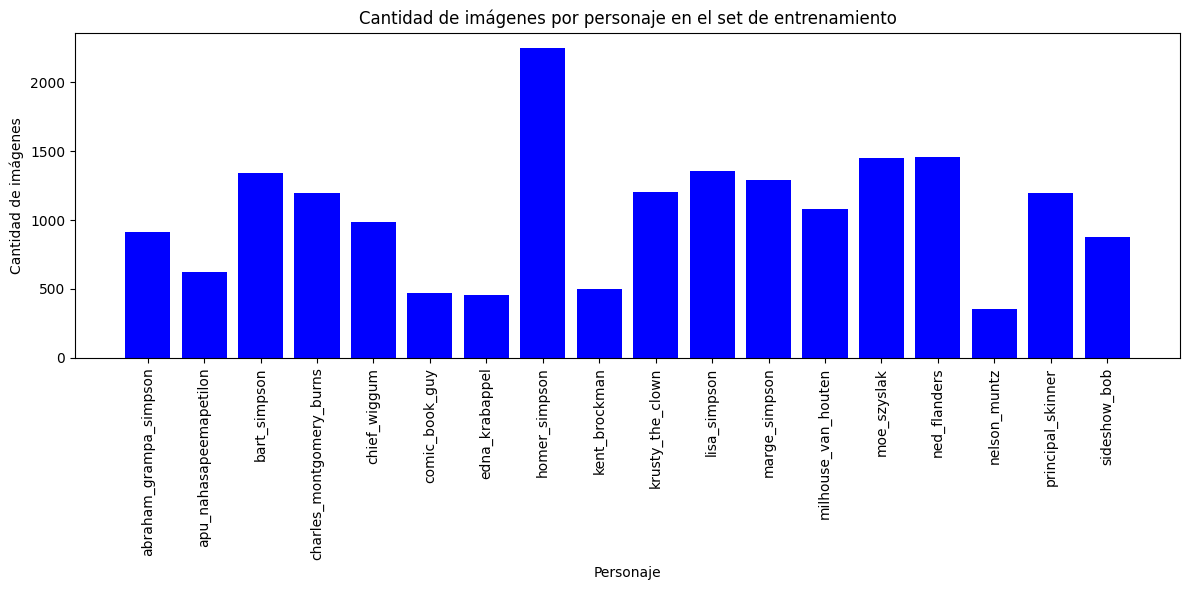

In [9]:
cantidad_por_personaje = collections.Counter(y)
nombres = [MAP_CHARACTERS[a] for a in cantidad_por_personaje.keys()]
cantidad = list(cantidad_por_personaje.values())

plt.figure(figsize=(12, 6))
plt.bar(nombres, cantidad, color='blue')
plt.xticks(rotation=90)
plt.title("Cantidad de imágenes por personaje en el set de entrenamiento")
plt.xlabel("Personaje")
plt.ylabel("Cantidad de imágenes")
plt.tight_layout()
plt.show()

Existen problemas en la distribución de las imágenes, ya que algunas clases, como la de homer_simpson, cuentan con más de 2,000 ejemplares, mientras que otras, como nelson_muntz, tienen menos de 500 imágenes. Esto podría generar dificultades en el entrenamiento, ya que las clases con pocos ejemplos podrían no ser identificadas correctamente por el modelo, lo que podría llevar a resultados inexactos.

Para mejorar esta distribución, se utilizará la técnica de data augmentation. Esta técnica genera variantes de una imagen original mediante transformaciones como rotaciones, volteos, escalado y otras modificaciones. El uso de data augmentation permite crear más ejemplos de las clases con menos imágenes, lo que ayuda a entrenar modelos más robustos y a evitar problemas de sobreentrenamiento, asegurando una mejor generalización del modelo.


DEFINIR LA COPIA DE LOS DATOS

In [10]:
# Copia de los datos originales
X_original = X.copy()
y_original = y.copy()

A continuación, se implementa la técnica de data augmentation para generar imágenes adicionales en las clases con pocos ejemplos. A través de transformaciones como rotaciones, desplazamientos y escalados, se amplía la diversidad del conjunto de entrenamiento. Esto permite equilibrar la cantidad de datos entre las clases, lo que favorece una mejor capacidad de generalización del modelo y optimiza su desempeño en las clases menos representadas. Al finalizar, las imágenes aumentadas se combinan con las originales para obtener un conjunto de datos balanceado.

In [11]:
# Crear el generador de aumento
datagen = ImageDataGenerator(
    rotation_range=15,         # Rango moderado, más seguro para rostros y figuras
    width_shift_range=0.1,     # Pequeños desplazamientos horizontales
    height_shift_range=0.1,    # Pequeños desplazamientos verticales
    shear_range=0.05,          # Inclinaciones leves para no distorsionar caras
    zoom_range=0.1,            # Zoom leve para variar escala
    horizontal_flip=True,      # Muy útil si el personaje se ve igual al voltearse
    fill_mode='nearest'        # Mantiene continuidad visual al rellenar bordes
)

# Contar imágenes por clase
class_counts = Counter(y)
max_count = max(class_counts.values())
print("Distribución original:", class_counts)

X_augmented = []
y_augmented = []

for class_label, count in class_counts.items():
    if count < max_count:
        n_to_generate = max_count - count
        print(f"Aumentando clase {class_label} ({MAP_CHARACTERS[class_label]}): generando {n_to_generate} imágenes...")

        # Obtener solo las imágenes de esta clase
        class_indices = np.where(y == class_label)[0]
        class_images = X[class_indices]

        # Elegir imágenes aleatorias para aumentar
        for _ in range(n_to_generate):
            img = random.choice(class_images)
            img = np.expand_dims(img, axis=0)
            augmented_img = next(datagen.flow(img, batch_size=1))[0].astype('uint8')
            X_augmented.append(augmented_img)
            y_augmented.append(class_label)

# Combinar datos originales + aumentados
X = np.concatenate([X, np.array(X_augmented)], axis=0)
y = np.concatenate([y, np.array(y_augmented)], axis=0)

# Verificar nueva distribución
print("Nueva distribución balanceada:", Counter(y))

Distribución original: Counter({np.int64(7): 2246, np.int64(14): 1454, np.int64(13): 1452, np.int64(10): 1354, np.int64(2): 1342, np.int64(11): 1291, np.int64(9): 1206, np.int64(16): 1194, np.int64(3): 1193, np.int64(12): 1079, np.int64(4): 986, np.int64(0): 913, np.int64(17): 877, np.int64(1): 623, np.int64(8): 498, np.int64(5): 469, np.int64(6): 457, np.int64(15): 358})
Aumentando clase 0 (abraham_grampa_simpson): generando 1333 imágenes...
Aumentando clase 1 (apu_nahasapeemapetilon): generando 1623 imágenes...
Aumentando clase 2 (bart_simpson): generando 904 imágenes...
Aumentando clase 3 (charles_montgomery_burns): generando 1053 imágenes...
Aumentando clase 4 (chief_wiggum): generando 1260 imágenes...
Aumentando clase 5 (comic_book_guy): generando 1777 imágenes...
Aumentando clase 6 (edna_krabappel): generando 1789 imágenes...
Aumentando clase 8 (kent_brockman): generando 1748 imágenes...
Aumentando clase 9 (krusty_the_clown): generando 1040 imágenes...
Aumentando clase 10 (lisa_s

Al aplicar la técnica de data augmentation, se busca equilibrar la cantidad de imágenes en cada clase. En este caso, la clase con más imágenes después de la augmentación es la clase 7, correspondiente a homer_simpson, que cuenta con un total de 2246 imágenes. Las demás clases generaron nuevas imágenes hasta alcanzar esta cantidad, asegurando que todas las clases tengan 2246 imágenes.

Como resultado, el número total de imágenes de entrenamiento es ahora de 40,428.

Ahora, para evitar sesgos en los datos y garantizar una distribución aleatoria tanto en el conjunto de entrenamiento como en el conjunto de validación, se barajan aleatoriamente las imágenes. Si no se realiza este paso, al separar el 20% de los datos para validación, podría ser que se estén utilizando solo un pequeño número de personajes.

El primer código baraja los datos sin data augmentation, mientras que el segundo bloque baraja los datos con data augmentation. En ambos casos, se asegura que el conjunto de datos esté completamente desordenado para mejorar la generalización del modelo durante el entrenamiento

In [12]:
# Se va a barajar aleatoriamente los datos. Esto es importante ya que si no
# se realiza y, por ejemplo, se escogen el 20% de los datos finales como validation
# set, se estará utilizando solo un pequeño número de personajes, ya que
# las imágenes se leen secuencialmente personaje a personaje.

#datos sin data augmentation
perm_orig = np.random.permutation(len(X_original))
X_noaug = X_original[perm_orig]
y_noaug = y_original[perm_orig]

In [13]:
#Datos con data augmentation
perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]

#PROBADNO PARA LIBBERAR RAM / FUNCIONO LA WEA SIIIIIIIIIIIIIIIIIII

In [14]:
import gc
del X_original
del y_original
del X_augmented
del y_augmented
gc.collect()

4746

Una vez que hemos aplicado la técnica de data augmentation y realizado la aleatoridad de los datos, el siguiente paso es separar el conjunto de datos de entrenamiento en dos subconjuntos: uno para entrenamiento y otro para validación. Utilizando la función train_test_split, se divide un 80% de los datos para entrenamiento y un 20% para validación tanto para los datos sin data augmentation como para los datos con data augmentation.

En este código, también se calcula y muestra el número total de imágenes de entrenamiento, validación y prueba, así como las dimensiones de cada conjunto y el número de canales de color para las imágenes. Se verifica que los tamaños de los conjuntos sean correctos y se asegura que la resolución de las imágenes coincida con las especificaciones previas.

Esto se realiza para garantizar que los datos estén organizados correctamente antes de entrenar y evaluar el modelo.

In [ ]:
# Separa el conjunto de datos de entrenamiento en entrenamiento y validación con 20% con datos sin data augmentation
X_train_noaug, X_val_noaug, y_train_noaug, y_val_noaug = train_test_split(X_noaug, y_noaug, test_size=0.2, random_state=29)


##DE ESTE TENDRIAMOS QUE HACER 2 EL pruimeor con la data no aug que son los datos puros y la otra con los de data aug

In [16]:
# Separa el conjunto de datos de entrenamiento en entrenamiento y validación con 20% con data augumentation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=29)

# Variables con nÚmero de elementos
X_train_num_elem = X_train.shape[0]
X_val_num_elem = X_val.shape[0]
X_test_num_elem = X_test.shape[0]

# Dimensiones
img_rows = IMG_SIZE
img_cols = IMG_SIZE
img_channels = X.shape[3]

# Número de categorías
num_categ = len(MAP_CHARACTERS)

# Comprueba que efectivamente los resultados son los esperados
print("Número de imágenes de anterior training : ", X.shape[0])
print("Número de imágenes de training (80% de anterior train) : ", X_train_num_elem)
print("Número de imágenes de validación (20% de anterior train) : ", X_val_num_elem)
print("Número de imágenes de test : ", X_test_num_elem)
print("="*15)
print("Número de resultados de anterior training : ", y.shape[0])
print("Número de resultados de training (80% de anterior train) : ", y_train.shape[0])
print("Número de resultadoss de validación (20% de anterior train) : ", y_val.shape[0])
print("Número de resultados de test : ", y_test.shape[0])
print("="*15)
print("Dimensiones de training : ", X_train.shape)
print("Dimensiones de validation : ", X_val.shape)
print("Dimensiones de tests : ", X_test.shape)
print("="*15)
print("Canales de color para las imagenes : ", img_channels)
print("Resolución imágenes de anterior training : ", X.shape[1], "x", X.shape[2])
print("Resolución imágenes de training (80% de anterior train) : ", X_train.shape[1], "X", X_train.shape[2])
print("Resolución imágenes de validación (20% de anterior train) : ", X_val.shape[1], "x", X_val.shape[2])
print("Resolución imágenes de test : ", X_test.shape[1], "x", X_test.shape[2])

Número de imágenes de anterior training :  40428
Número de imágenes de training (80% de anterior train) :  32342
Número de imágenes de validación (20% de anterior train) :  8086
Número de imágenes de test :  890
Número de resultados de anterior training :  40428
Número de resultados de training (80% de anterior train) :  32342
Número de resultadoss de validación (20% de anterior train) :  8086
Número de resultados de test :  890
Dimensiones de training :  (32342, 64, 64, 3)
Dimensiones de validation :  (8086, 64, 64, 3)
Dimensiones de tests :  (890, 64, 64, 3)
Canales de color para las imagenes :  3
Resolución imágenes de anterior training :  64 x 64
Resolución imágenes de training (80% de anterior train) :  64 X 64
Resolución imágenes de validación (20% de anterior train) :  64 x 64
Resolución imágenes de test :  64 x 64


A contunuación se realiza la normalización de las imágenes tanto para los datos con data augmentation como para los datos sin data augmentation. La normalización se realiza dividiendo los valores de las imágenes entre 255 para que todos los valores estén en el rango [0, 1], lo que ayuda a mejorar el entrenamiento del modelo al hacer que el aprendizaje sea más eficiente.

Además, se aplica la técnica de one-hot encoding a las etiquetas, tanto para los datos con data augmentation como para los datos sin ella. El one-hot encoding transforma las etiquetas de clase en vectores binarios, donde solo la posición correspondiente a la clase es 1, y las demás posiciones son 0. Esto es necesario porque muchos modelos de redes neuronales requieren que las etiquetas estén en este formato para tareas de clasificación multiclase.

Finalmente, se imprime la forma de los conjuntos de entrenamiento, validación y prueba tanto para las imágenes como para las etiquetas para asegurarse de que las dimensiones son las correctas antes de proceder con el entrenamiento del modelo.

In [17]:
#normalizar sin data augmentation
X_train_noaug = X_train_noaug / 255
X_val_noaug = X_val_noaug / 255
X_test_norm = X_test / 255
print(X_train_noaug.shape, X_val_noaug.shape, X_test_norm.shape)


#aplicar el one-hot sin data augmentation
y_train_noaug = keras.utils.to_categorical(y_train_noaug, 18)
y_val_noaug = keras.utils.to_categorical(y_val_noaug, 18)
y_test_oh = keras.utils.to_categorical(y_test, 18)

print(y_train_noaug.shape, y_val_noaug.shape, y_test_oh.shape)

(15193, 64, 64, 3) (3799, 64, 64, 3) (890, 64, 64, 3)
(15193, 18) (3799, 18) (890, 18)


In [18]:
#normalizar con data augmentation
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255
print(X_train.shape, X_val.shape, X_test.shape)

#aplicar el one-hot con data augmentation
y_train = keras.utils.to_categorical(y_train, 18)
y_val = keras.utils.to_categorical(y_val, 18)
y_test = keras.utils.to_categorical(y_test, 18)

print(y_train.shape, y_val.shape, y_test.shape)

(32342, 64, 64, 3) (8086, 64, 64, 3) (890, 64, 64, 3)
(32342, 18) (8086, 18) (890, 18)


#######################ARREGLAR!!!!

Tras aplicar la normalización y el one-hot encoding, se obtiene la siguiente estructura final de los datos:

Datos de entrada (imágenes):



*   Entrenamiento: 32,342 imágenes
*   Validación: 8,086 imágenes
*   Test: 890 imágenes
*   Todas con resolución de 64x64 píxeles y 3 canales de color (RGB)


Etiquetas (one-hot):



*   Entrenamiento: vectores de dimensión 18 para cada imagen
*   Validación: vectores de dimensión 18
*   Test: vectores de dimensión 18

Estos resultados confirman que los datos están correctamente preparados y

# Definición de modelos

# Definición de modelos

En esta etapa se procederá a definir y entrenar distintos modelos de redes neuronales con el objetivo de clasificar imágenes de personajes de la serie Los Simpson. El enfoque consiste en partir desde un modelo base, entrenado sin data augmentation, y progresivamente ir incrementando la complejidad de los modelos mediante la incorporación de:



*   Data augmentation
*   Capas convolucionales (Conv2D) para extracción de características espaciales
*   Capas de pooling (MaxPooling2D) para reducción de dimensionalidad
*   Capas de regularización como Dropout, que ayudan a prevenir el sobreajuste
*   Y finalmente, Batch Normalization, para estabilizar y acelerar el entrenamiento.


Los distintos modelos serán comparados utilizando métricas como el accuracy, recally precision en el conjunto de validación y test, así como mediante el análisis de curvas de aprendizaje (accuracy y loss por época). Esto permitirá evaluar cada modificación (uso de data augmentation, capas adicionales, regularización, etc.) sobre el rendimiento general.

El objetivo final es identificar la arquitectura que logre el mejor equilibrio entre rendimiento y generalización, con especial énfasis en evitar el sobreajuste, manteniendo un entrenamiento eficiente.

## Configuración común para todos los modelos

Cada modelo se entrena utilizando una configuración de hiperparámetros común, seleccionados para equilibrar precisión, velocidad de convergencia y estabilidad durante el aprendizaje:

Optimizador: Adam
Se utiliza el optimizador Adam ya que es eficiente computacionalmente, requiere poca memoria y se adapta bien a problemas con grandes cantidades de datos y parámetros, como las redes neuronales convolucionales.

Función de activación (capas ocultas): Relu
La función de activación Relu se elige porque introduce no linealidad de forma eficiente y ayuda a evitar el problema del gradiente, permitiendo que las redes profundas aprendan patrones complejos.

Función de activación (capa de salida): Softmax
Se usa softmax en la capa de salida porque el problema es de clasificación multiclase. Esta función convierte los valores de salida en probabilidades que suman 1, lo que permite interpretar cada salida como la probabilidad de pertenencia a una clase.

Función de pérdida: categorical_crossentropy
Dado que las etiquetas están codificadas en one-hot y se trata de un problema de clasificación con más de dos clases, la función categorical_crossentropy es la más adecuada para calcular la pérdida entre las predicciones y las clases reales.

#TIRAR PARA ARRIBA

In [19]:
import matplotlib.pyplot as plt

def graficar_historial_entrenamiento(hist):
    """
    Grafica la pérdida y la precisión del entrenamiento y validación a lo largo de las épocas.

    Parámetros:
    hist -- Objeto History devuelto por el método fit() de un modelo Keras.

    ###Dejo el comentario igual como lo hace la profe en sus notes
    """
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    epocas = range(1, len(hist.history['loss']) + 1)

    axs[0].plot(epocas, hist.history['loss'], label="train")
    axs[0].plot(epocas, hist.history['val_loss'], label="test")
    axs[0].set_title('Pérdida', fontsize=14, fontweight="bold")
    axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
    axs[0].legend()

    axs[1].plot(epocas, hist.history['accuracy'], label="train")
    axs[1].plot(epocas, hist.history['val_accuracy'], label="test")
    axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
    axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

In [20]:
def crear_df_metricas(hist, nombre_red="Red"):
    """
    Crea un DataFrame con las métricas finales o de la epoca final del historial de entrenamiento.

    Parámetros:
    hist -- Objeto History devuelto por el método fit() de un modelo Keras.
    nombre_red -- Nombre identificador de la red, usado como encabezado de la columna de métricas.

    Retorna:
    Un DataFrame con los nombres de las métricas y sus valores finales.
    """
    metricas = {
        'Métrica': list(hist.history.keys()),
        nombre_red: [hist.history[k][-1] for k in hist.history],
    }

    df_metricas = pd.DataFrame(metricas)
    display(df_metricas)
    return df_metricas


In [21]:
def graficar_comparacion_modelos(historiales, nombres_modelos):
    """
    Crea un gráfico de barras comparando métricas finales (accuracy, val_accuracy, loss, val_loss) de varios modelos.

    Parámetros:
    historiales -- Lista de objetos history (dict o hist.history de Keras).
    nombres_modelos -- Lista de nombres que identifican a cada modelo (str), en el mismo orden que los historiales.
    """
    if len(historiales) != len(nombres_modelos):
        raise ValueError("Las listas de historiales y nombres de modelos deben tener la misma longitud.")

    metricas = ['accuracy', 'val_accuracy', 'loss', 'val_loss']
    nombres_metricas = ['Accuracy', 'Val Accuracy', 'Loss', 'Val Loss']

    data = {'Métrica': nombres_metricas}

    for nombre, hist in zip(nombres_modelos, historiales):
        valores = [hist[m][-1] if m in hist else None for m in metricas]
        data[nombre] = valores

    df_comparacion = pd.DataFrame(data)

    # Configuración del gráfico
    plt.figure(figsize=(18, 6))
    bar_width = 0.8 / len(nombres_modelos)
    index = range(len(nombres_metricas))

    # Dibujar las barras para cada modelo
    for i, nombre in enumerate(nombres_modelos):
        posiciones = [j + (i - len(nombres_modelos)/2) * bar_width + bar_width/2 for j in index]
        barras = plt.bar(posiciones, df_comparacion[nombre], bar_width, label=nombre)
        for bar in barras:
            height = bar.get_height()
            if height is not None:
                plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom', fontsize=8)

    # Etiquetas y título
    plt.xlabel('Métrica')
    plt.ylabel('Valor')
    plt.title('Comparación de Métricas entre Modelos')
    plt.xticks(index, nombres_metricas, rotation=45)
    plt.legend(title='Modelos', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    return df_comparacion  # Por si deseas guardar o mostrar el DataFrame


In [22]:
def metricas(history):
    return {
        'Train Accuracy': f"{history.history['accuracy'][-1]:.4f}",
        'Validation Accuracy': f"{history.history['val_accuracy'][-1]:.4f}",
        'Train Loss': f"{history.history['loss'][-1]:.4f}",
        'Validation Loss': f"{history.history['val_loss'][-1]:.4f}"
    }

#MODELOS SIN DATA AUG

## Modelo 1

1 conv, 1 maxpolling, 5 capas ocultas y droout

La arquitectura del modelo definido como red_sin_augmentation comienza con una capa de entrada que recibe imágenes de tamaño 64x64 con 3 canales de color (RGB). A continuación, se aplica una única capa convolucional con 32 filtros de tamaño 3x3 y activación ReLU, seguida de una capa de max pooling de tamaño 2x2, que reduce la dimensión espacial de las características extraídas. Luego, las salidas se aplanan mediante una capa Flatten, lo que permite conectarlas con una serie de capas densas. Estas capas totalmente conectadas tienen tamaños decrecientes: 512, 256, 128, 64 y 32 neuronas respectivamente, todas con activación ReLU, y entre ellas se incorporan capas de Dropout con tasas de entre 30% y 35% para reducir el riesgo de sobreajuste. Finalmente, se incluye una capa de salida con 18 neuronas y activación softmax, adecuada para la clasificación multiclase del conjunto de personajes. Esta arquitectura busca equilibrar capacidad de representación y regularización, pero al contar con solo una capa convolucional, se enfoca más en el aprendizaje profundo a través de las capas densas que en la extracción jerárquica de características visuales.

In [23]:
red_sin_augmentation = keras.Sequential(name="Primera_red_sin_aug")
red_sin_augmentation.add(Input(shape=(64, 64, 3), name="entrada"))

red_sin_augmentation.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_sin_augmentation.add(MaxPooling2D((2, 2), name="pooling_1"))

red_sin_augmentation.add(Flatten(name="flatten_1"))

red_sin_augmentation.add(Dropout(0.3, name="dropout_1"))
red_sin_augmentation.add(Dense(512, activation='relu', name="CapaOculta_1"))
red_sin_augmentation.add(Dropout(0.3, name="dropout_2"))
red_sin_augmentation.add(Dense(256, activation='relu', name="CapaOculta_2"))
red_sin_augmentation.add(Dense(128, activation='relu', name="CapaOculta_3"))
red_sin_augmentation.add(Dropout(0.3, name="dropout_3"))
red_sin_augmentation.add(Dense(64, activation='relu', name="CapaOculta_4"))
red_sin_augmentation.add(Dropout(0.3, name="dropout_4"))
red_sin_augmentation.add(Dense(32, activation='relu', name="CapaOculta_5"))
red_sin_augmentation.add(Dropout(0.35, name="dropout_5"))
red_sin_augmentation.add(Dense(18, activation='softmax', name="salida"))
red_sin_augmentation.summary()

Model: "Primera_red_sin_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_1 (Dense)            │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_2 (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_3 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_4 (Dense)            │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_5 (Dense)            │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │           594 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,953,778 (64.67 MB)

 Trainable params: 16,953,778 (64.67 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
red_sin_augmentation.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_sin_aug = red_sin_augmentation.fit(
    X_train_noaug, y_train_noaug,
    validation_data=(X_val_noaug, y_val_noaug),
    batch_size=32,
    epochs=10
)

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.0988 - loss: 2.8688 - precision: 0.2810 - recall: 0.0035 - val_accuracy: 0.1882 - val_loss: 2.5326 - val_precision: 0.7224 - val_recall: 0.0534
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2062 - loss: 2.4654 - precision: 0.7052 - recall: 0.0570 - val_accuracy: 0.3654 - val_loss: 2.0745 - val_precision: 0.8398 - val_recall: 0.0855
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3588 - loss: 2.0449 - precision: 0.7326 - recall: 0.1460 - val_accuracy: 0.4712 - val_loss: 1.7680 - val_precision: 0.8550 - val_recall: 0.2453
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4851 - loss: 1.6345 - precision: 0.7997 - recall: 0.2972 - val_accuracy: 0.5062 - val_loss: 1.5982 - val_precision: 0.8066 - val_recall: 0.3369
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5747 - loss: 1.3440 - precision: 0.8117 - recall: 0.3928 - val_accuracy: 0.5675 - val_los

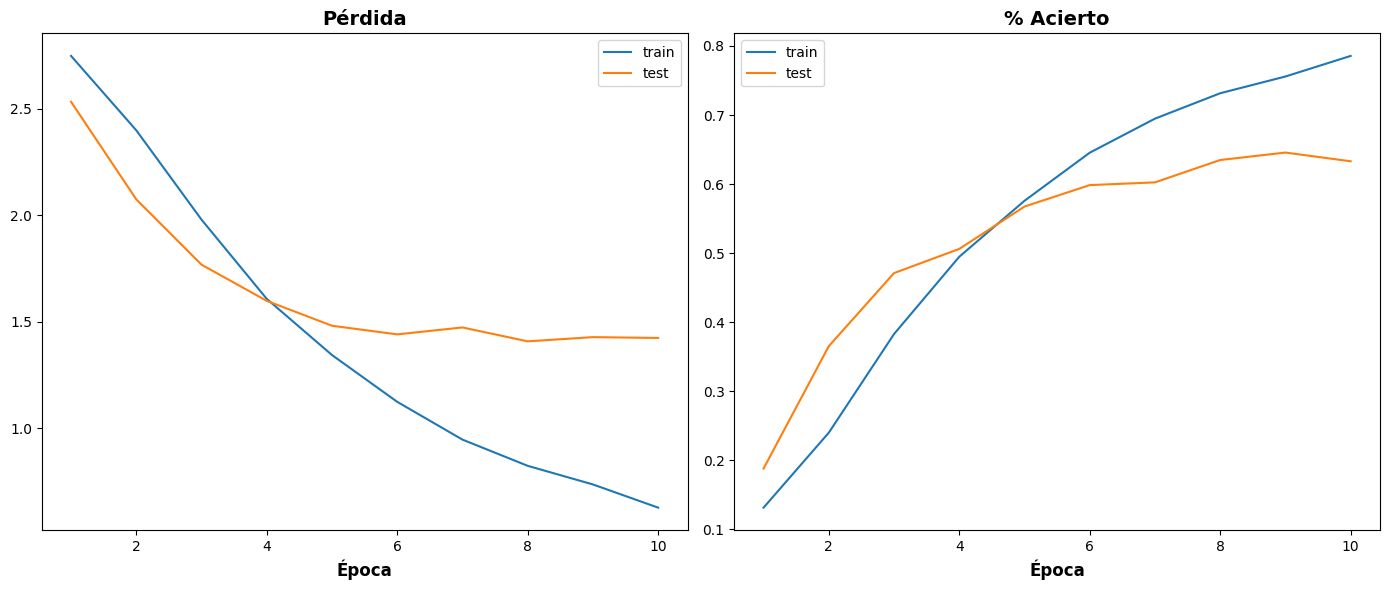

In [25]:
graficar_historial_entrenamiento(hist_sin_aug)

In [26]:
df_metricas_red_sin_augmentation = crear_df_metricas(hist_sin_aug, "Primera_red_sin_aug")

Métrica  Primera_red_sin_aug
0       accuracy             0.785625
1           loss             0.627697
2      precision             0.875551
3         recall             0.719608
4   val_accuracy             0.633061
5       val_loss             1.424126
6  val_precision             0.761787
7     val_recall             0.565675

*pequeña conclucion

*pequeña conclucion

*pequeña conclucion

##Modelo 2

Cambio: 1 conv y 1 maxpolling mas, se mantiene arquitectura anterior

2 conv, 2 maxpolling, 5 capas ocultas y dropout

La arquitectura definida como red_sin_augmentation_2 presenta una estructura más profunda y robusta que la anterior, incorporando múltiples etapas de extracción de características. Inicia con una capa de entrada que recibe imágenes de tamaño 64x64 con tres canales de color. A continuación, se aplican dos capas convolucionales consecutivas: la primera con 32 filtros y la segunda con 64, ambas de tamaño 3x3, activación ReLU y con padding 'same' para preservar las dimensiones espaciales. Cada capa convolucional es seguida por una capa de max pooling de tamaño 2x2, lo que permite reducir progresivamente la resolución de las características aprendidas y mantener la información más relevante.

Posteriormente, se utiliza una capa Flatten para transformar la salida tridimensional en un vector unidimensional, que alimenta una serie de capas densas. Estas capas ocultas tienen 512, 256, 128, 64 y 32 neuronas respectivamente, todas con activación ReLU. Entre estas capas se intercalan varias capas Dropout con tasas del 30% y 35%, destinadas a mitigar el sobreajuste y mejorar la generalización del modelo. Finalmente, se incluye una capa de salida con 18 neuronas y activación softmax, adecuada para clasificar entre los 18 personajes considerados.

Esta red aprovecha mejor la estructura jerárquica de las imágenes al incorporar dos bloques convolucionales, lo cual le permite aprender patrones visuales más complejos antes de la clasificación final.

In [27]:
red_sin_augmentation_2 = keras.Sequential(name="Segunda_red_sin_aug")
red_sin_augmentation_2.add(Input(shape=(64, 64, 3), name="entrada"))

red_sin_augmentation_2.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_sin_augmentation_2.add(MaxPooling2D((2, 2), name="pooling_1"))

red_sin_augmentation_2.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
red_sin_augmentation_2.add(MaxPooling2D((2, 2), name="pooling_2"))

red_sin_augmentation_2.add(Flatten(name="flatten_1"))

red_sin_augmentation_2.add(Dropout(0.3, name="dropout_1"))
red_sin_augmentation_2.add(Dense(512, activation='relu', name="CapaOculta_1"))

red_sin_augmentation_2.add(Dropout(0.3, name="dropout_2"))
red_sin_augmentation_2.add(Dense(256, activation='relu', name="CapaOculta_2"))

red_sin_augmentation_2.add(Dense(128, activation='relu', name="CapaOculta_3"))

red_sin_augmentation_2.add(Dropout(0.3, name="dropout_3"))
red_sin_augmentation_2.add(Dense(64, activation='relu', name="CapaOculta_4"))

red_sin_augmentation_2.add(Dropout(0.3, name="dropout_4"))
red_sin_augmentation_2.add(Dense(32, activation='relu', name="CapaOculta_5"))

red_sin_augmentation_2.add(Dropout(0.35, name="dropout_5"))

red_sin_augmentation_2.add(Dense(18, activation='softmax', name="salida"))

red_sin_augmentation_2.summary()

Model: "Segunda_red_sin_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_2 (Conv2D)          │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_1 (Dense)            │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_2 (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_3 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_4 (Dense)            │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_5 (Dense)            │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │           594 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,583,666 (32.74 MB)

 Trainable params: 8,583,666 (32.74 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
np.random.seed(29)
tf.random.set_seed(29)

red_sin_augmentation_2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_sin_aug_2 = red_sin_augmentation_2.fit(
    X_train_noaug, y_train_noaug,
    batch_size=32,
    epochs=10,
    validation_data=(X_val_noaug, y_val_noaug)
)

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.1115 - loss: 2.7975 - precision: 0.3362 - recall: 0.0058 - val_accuracy: 0.2240 - val_loss: 2.3745 - val_precision: 0.8640 - val_recall: 0.0619
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.2452 - loss: 2.3762 - precision: 0.6921 - recall: 0.0723 - val_accuracy: 0.4425 - val_loss: 1.8412 - val_precision: 0.8116 - val_recall: 0.1656
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3788 - loss: 1.9677 - precision: 0.7271 - recall: 0.1558 - val_accuracy: 0.5057 - val_loss: 1.5590 - val_precision: 0.8512 - val_recall: 0.2724
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4831 - loss: 1.6555 - precision: 0.7832 - recall: 0.2737 - val_accuracy: 0.5596 - val_loss: 1.3817 - val_precision: 0.8122 - val_recall: 0.3904
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5416 - loss: 1.4462 - precision: 0.8020 - recall: 0.3557 - val_accuracy: 0.5875 - val_loss

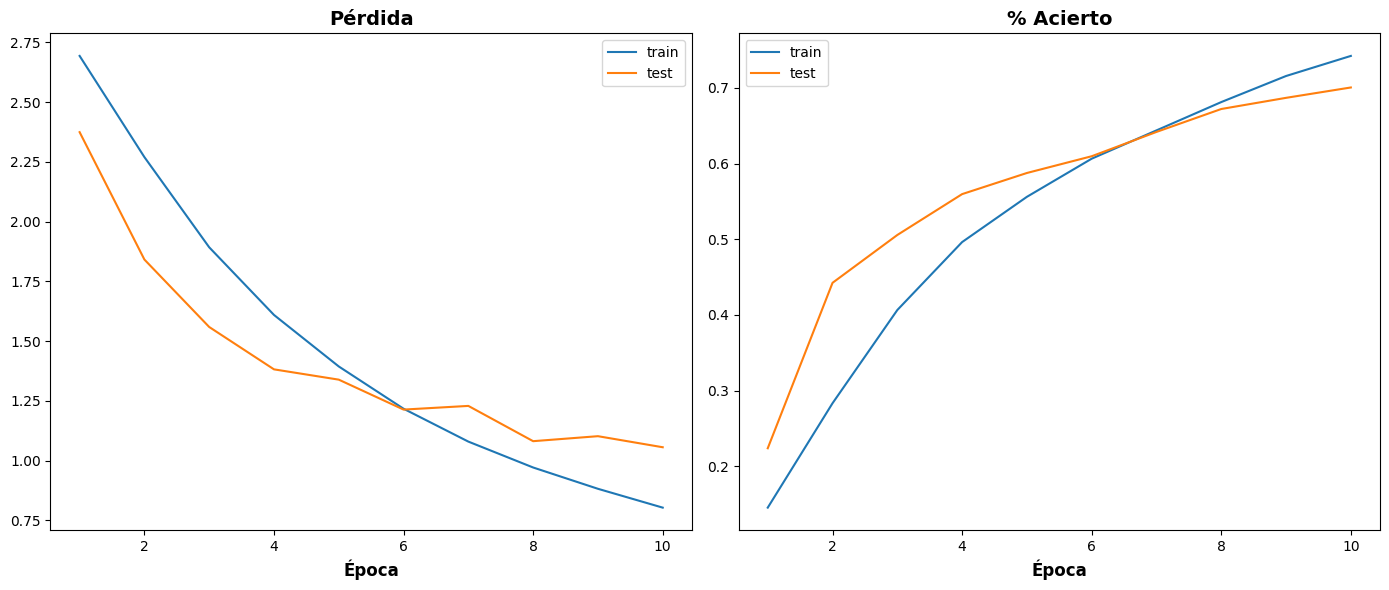

In [29]:
graficar_historial_entrenamiento(hist_sin_aug_2)

In [30]:
df_metricas_red_sin_augmentation_2 = crear_df_metricas(hist_sin_aug_2, "Segunda_red_sin_aug")

Métrica  Segunda_red_sin_aug
0       accuracy             0.742118
1           loss             0.802869
2      precision             0.856637
3         recall             0.637530
4   val_accuracy             0.700447
5       val_loss             1.055647
6  val_precision             0.826662
7     val_recall             0.608844

*pequeña conclucion

*pequeña conclucion

*pequeña conclucion

##Modelo 3

Cambio: 1 conv y 1 maxpolling mas, se quitan 3 capas ocultas, se mantiene lo demas

3 conv, 3 maxpolling, 2 capas ocultas y dropout

La arquitectura denominada red_sin_augmentation_3 representa un diseño aún más profundo y sofisticado, ideal para capturar estructuras visuales complejas en las imágenes. Esta red comienza con una capa de entrada que recibe imágenes de 64x64 píxeles con tres canales de color (RGB). Luego, se despliegan tres bloques convolucionales secuenciales: el primero con 32 filtros, el segundo con 64 y el tercero con 128, todos con kernels de tamaño 3x3, activación ReLU y padding 'same', lo que permite preservar el tamaño espacial a lo largo de las capas. Cada bloque convolucional es seguido por una capa de max pooling de tamaño 2x2, que reduce las dimensiones espaciales y conserva las características más representativas.

Después de esta etapa de extracción de características, la red aplana la salida tridimensional mediante una capa Flatten, preparando los datos para las capas completamente conectadas. Se incorporan dos capas densas: la primera con 256 neuronas y la segunda con 128, ambas utilizando activación ReLU. Entre estas capas se intercalan varias capas Dropout, con tasas del 40% y 30%, lo que tiene como objetivo prevenir el sobreajuste al introducir aleatoriedad en el proceso de entrenamiento. Finalmente, la red culmina con una capa Dense de 18 neuronas con activación softmax, que permite clasificar la imagen entre los 18 personajes considerados.

In [31]:
red_sin_augmentation_3 = keras.Sequential(name="Tercera_red_sin_aug")
red_sin_augmentation_3.add(Input(shape=(64, 64, 3), name="entrada"))

red_sin_augmentation_3.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_sin_augmentation_3.add(MaxPooling2D((2, 2), name="pooling_1"))

red_sin_augmentation_3.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
red_sin_augmentation_3.add(MaxPooling2D((2, 2), name="pooling_2"))

red_sin_augmentation_3.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_3"))
red_sin_augmentation_3.add(MaxPooling2D((2, 2), name="pooling_3"))

red_sin_augmentation_3.add(Flatten(name="flatten_1"))

red_sin_augmentation_3.add(Dropout(0.4, name="dropout_1"))
red_sin_augmentation_3.add(Dense(256, activation='relu', name="CapaOculta_1"))
red_sin_augmentation_3.add(Dropout(0.4, name="dropout_2"))
red_sin_augmentation_3.add(Dense(128, activation='relu', name="CapaOculta_2"))
red_sin_augmentation_3.add(Dropout(0.3, name="dropout_3"))
red_sin_augmentation_3.add(Dense(18, activation='softmax', name="salida"))

red_sin_augmentation_3.summary()

Model: "Tercera_red_sin_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_2 (Conv2D)          │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_3 (Conv2D)          │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_1 (Dense)            │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_2 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,225,874 (8.49 MB)

 Trainable params: 2,225,874 (8.49 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
np.random.seed(29)
tf.random.set_seed(29)

red_sin_augmentation_3.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_sin_aug_3 = red_sin_augmentation_3.fit(
    X_train_noaug, y_train_noaug,
    batch_size=32,
    epochs=10,
    validation_data=(X_val_noaug, y_val_noaug)
)

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.1828 - loss: 2.5950 - precision: 0.5221 - recall: 0.0294 - val_accuracy: 0.5230 - val_loss: 1.5668 - val_precision: 0.8475 - val_recall: 0.2677
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5115 - loss: 1.6125 - precision: 0.7654 - recall: 0.3030 - val_accuracy: 0.7078 - val_loss: 1.0000 - val_precision: 0.8754 - val_recall: 0.5436
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6468 - loss: 1.1486 - precision: 0.8190 - recall: 0.5085 - val_accuracy: 0.7370 - val_loss: 0.8488 - val_precision: 0.8630 - val_recall: 0.6365
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7330 - loss: 0.8652 - precision: 0.8582 - recall: 0.6325 - val_accuracy: 0.7899 - val_loss: 0.6750 - val_precision: 0.8923 - val_recall: 0.7112
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7793 - loss: 0.6985 - precision: 0.8822 - recall: 0.7022 - val_accuracy: 0.8202 - val_loss:

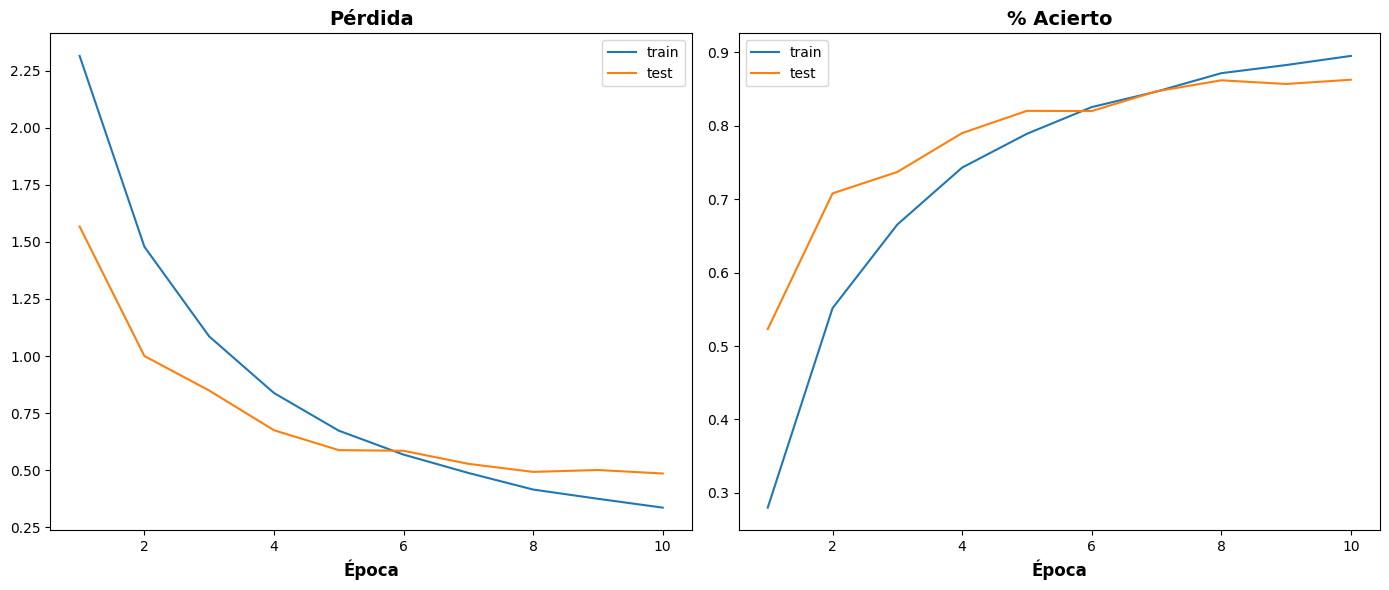

In [33]:
graficar_historial_entrenamiento(hist_sin_aug_3)

In [34]:
df_metricas_red_sin_augmentation_3 = crear_df_metricas(hist_sin_aug_3, "Tercera_red_sin_aug")

Métrica  Tercera_red_sin_aug
0       accuracy             0.895017
1           loss             0.336125
2      precision             0.931118
3         recall             0.864806
4   val_accuracy             0.862595
5       val_loss             0.485562
6  val_precision             0.907466
7     val_recall             0.828639

*pequeña conclucion

*pequeña conclucion

*pequeña conclucion

##Modelo 4

Cambio: Agregacion de batchnormalization (5), se mantiene lo demas

3 conv, 3 maxpolling, 5 batch normalization, 2 capas ocultas y dropout

La arquitectura denominada red_sin_augmentation_4 se basa en la estructura previamente utilizada en la tercera red, pero incorpora una mejora clave: la inclusión de capas de Batch Normalization después de cada capa convolucional y también entre las capas densas. Esta técnica de normalización tiene como objetivo reducir la covariancia interna de las activaciones, lo que facilita un entrenamiento más estable y rápido. En consecuencia, se logra una mejor regularización y se disminuye el riesgo de sobreajuste.

La red comienza con una capa convolucional de 32 filtros, seguida por normalización y un max pooling. Este patrón se repite, aumentando progresivamente la profundidad a 64 y luego a 128 filtros en las siguientes capas convolucionales, cada una seguida de su correspondiente capa de normalización y pooling. Luego, se aplanan las salidas con Flatten para conectar con la etapa densa del modelo.

En la parte totalmente conectada, se aplican dos capas densas con 256 y 128 unidades respectivamente, ambas acompañadas por Dropout (con tasas de 0.4) y BatchNormalization. Finalmente, la salida del modelo es gestionada por una capa Dense con 18 neuronas y activación softmax, adecuada para una clasificación multiclase con 18 categorías.

Este diseño representa un refinamiento respecto a las redes anteriores: se mantiene la capacidad de aprendizaje profundo, pero se potencia la estabilidad y generalización mediante normalización, lo que puede resultar especialmente útil cuando se entrena sin técnicas de data augmentation.

In [35]:
red_sin_augmentation_4 = keras.Sequential(name="Cuarta_red_sin_aug")
red_sin_augmentation_4.add(Input(shape=(64, 64, 3), name="entrada"))

red_sin_augmentation_4.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_sin_augmentation_4.add(BatchNormalization(name="batchNormalization_1"))
red_sin_augmentation_4.add(MaxPooling2D((2, 2), name="pooling_1"))

red_sin_augmentation_4.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
red_sin_augmentation_4.add(BatchNormalization(name="batchNormalization_2"))
red_sin_augmentation_4.add(MaxPooling2D((2, 2), name="pooling_2"))

red_sin_augmentation_4.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_3"))
red_sin_augmentation_4.add(BatchNormalization(name="batchNormalization_3"))
red_sin_augmentation_4.add(MaxPooling2D((2, 2), name="pooling_3"))

red_sin_augmentation_4.add(Flatten(name="Flatten"))

red_sin_augmentation_4.add(Dropout(0.4, name="dropout_1"))
red_sin_augmentation_4.add(Dense(256, activation='relu', name="CapaOculta_1"))
red_sin_augmentation_4.add(BatchNormalization(name="batchNormalization_4"))

red_sin_augmentation_4.add(Dropout(0.4, name="dropout_2"))
red_sin_augmentation_4.add(Dense(128, activation='relu', name="CapaOculta_2"))
red_sin_augmentation_4.add(BatchNormalization(name="batchNormalization_5"))

red_sin_augmentation_4.add(Dropout(0.3, name="dropout_3"))
red_sin_augmentation_4.add(Dense(18, activation='softmax', name="salida"))

red_sin_augmentation_4.summary()

Model: "Cuarta_red_sin_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_1            │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_2 (Conv2D)          │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_2            │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_3 (Conv2D)          │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_3            │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_1 (Dense)            │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_4            │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_2 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_5            │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,228,306 (8.50 MB)

 Trainable params: 2,227,090 (8.50 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [36]:
np.random.seed(29)
tf.random.set_seed(29)

red_sin_augmentation_4.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_sin_aug_4 = red_sin_augmentation_4.fit(
    X_train_noaug, y_train_noaug,
    batch_size=32,
    epochs=10,
    validation_data=(X_val_noaug, y_val_noaug)
)

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.2872 - loss: 2.5706 - precision: 0.4655 - recall: 0.1396 - val_accuracy: 0.2788 - val_loss: 2.4172 - val_precision: 0.3580 - val_recall: 0.1819
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5836 - loss: 1.3996 - precision: 0.7737 - recall: 0.4350 - val_accuracy: 0.6694 - val_loss: 1.0920 - val_precision: 0.8413 - val_recall: 0.5528
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6970 - loss: 1.0097 - precision: 0.8391 - recall: 0.5890 - val_accuracy: 0.7331 - val_loss: 0.8783 - val_precision: 0.8622 - val_recall: 0.6294
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7703 - loss: 0.7559 - precision: 0.8744 - recall: 0.6872 - val_accuracy: 0.6341 - val_loss: 1.2872 - val_precision: 0.7028 - val_recall: 0.5838
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8197 - loss: 0.5835 - precision: 0.8964 - recall: 0.7591 - val_accuracy: 0.7989 - val_loss: 

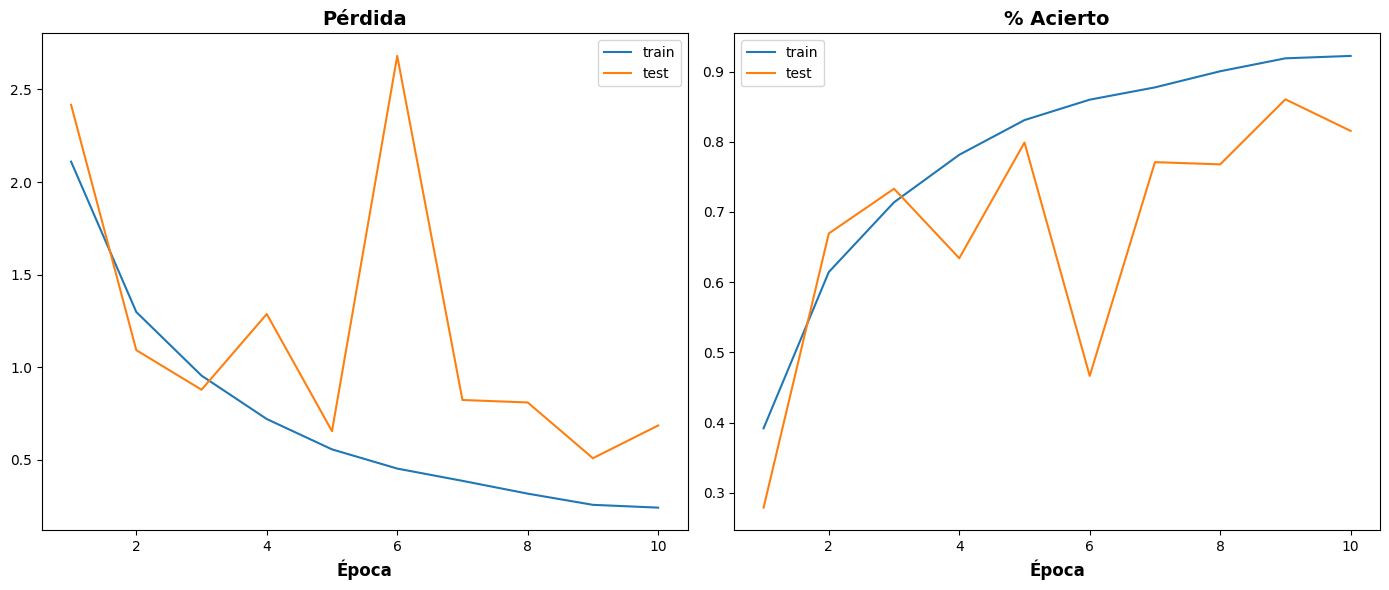

In [37]:
graficar_historial_entrenamiento(hist_sin_aug_4)

In [38]:
df_metricas_red_sin_augmentation_4 = crear_df_metricas(hist_sin_aug_4, "Cuarta_red_sin_aug")

Métrica  Cuarta_red_sin_aug
0       accuracy            0.922333
1           loss            0.241507
2      precision            0.942628
3         recall            0.905154
4   val_accuracy            0.815478
5       val_loss            0.685125
6  val_precision            0.851052
7     val_recall            0.798631

*pequeña conclucion

*pequeña conclucion

*pequeña conclucion

##Modelo 5

Cambio: Se agrega 1 conv, maxpolling y batch normalization mas, se mantiene lo demas

4 conv, 4 maxpolling, 6 batch normalization, 2 capas ocultas y dropout

La arquitectura red_sin_augmentation_5 representa la versión más profunda y compleja de todas las redes desarrolladas sin técnicas de aumento de datos. En esta propuesta se mantiene el enfoque exitoso de la cuarta red, que ya incorporaba normalización por lotes (BatchNormalization), pero se incrementa la capacidad expresiva de la red al agregar una cuarta capa convolucional con 128 filtros, repitiendo la profundidad de la anterior y potenciando la extracción de características.

La red se inicia con una capa de convolución de 32 filtros, seguida por normalización y reducción de dimensionalidad mediante MaxPooling2D. Este patrón se repite con 64, luego 128 filtros y nuevamente 128, en cada caso acompañado de BatchNormalization y MaxPooling, lo que permite capturar patrones cada vez más complejos a medida que se profundiza la red. La inclusión de esta cuarta capa convolucional busca mejorar el desempeño frente a clases con características visuales más sutiles.

Posteriormente, se aplica Flatten para pasar a las capas densas, que conservan la estructura previamente validada: una capa de 256 unidades y otra de 128, cada una seguida por Dropout y BatchNormalization, lo cual fortalece la regularización y estabiliza el entrenamiento. Finalmente, la salida está compuesta por una capa Dense de 18 neuronas con activación softmax, correspondiente al número de clases.

Esta quinta red, al ser más profunda y sofisticada, está diseñada para explorar si un modelo más complejo puede mejorar el rendimiento sin aumentar los datos, gracias a una mayor capacidad de abstracción y una regulación adecuada que mitigue el sobreajuste.

In [39]:
red_sin_augmentation_5 = keras.Sequential(name="Quinta_red_sin_aug")
red_sin_augmentation_5.add(Input(shape=(64, 64, 3), name="entrada"))

red_sin_augmentation_5.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_sin_augmentation_5.add(BatchNormalization(name="batchNormalization_1"))
red_sin_augmentation_5.add(MaxPooling2D((2, 2), name="pooling_1"))

red_sin_augmentation_5.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
red_sin_augmentation_5.add(BatchNormalization(name="batchNormalization_2"))
red_sin_augmentation_5.add(MaxPooling2D((2, 2), name="pooling_2"))

red_sin_augmentation_5.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_3"))
red_sin_augmentation_5.add(BatchNormalization(name="batchNormalization_3"))
red_sin_augmentation_5.add(MaxPooling2D((2, 2), name="pooling_3"))

red_sin_augmentation_5.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_4"))
red_sin_augmentation_5.add(BatchNormalization(name="batchNormalization_4"))
red_sin_augmentation_5.add(MaxPooling2D((2, 2), name="pooling_4"))

red_sin_augmentation_5.add(Flatten(name="Flatten"))

red_sin_augmentation_5.add(Dropout(0.4, name="dropout_1"))
red_sin_augmentation_5.add(Dense(256, activation='relu', name="CapaOculta_1"))
red_sin_augmentation_5.add(BatchNormalization(name="batchNormalization_5"))

red_sin_augmentation_5.add(Dropout(0.4, name="dropout_2"))
red_sin_augmentation_5.add(Dense(128, activation='relu', name="CapaOculta_2"))
red_sin_augmentation_5.add(BatchNormalization(name="batchNormalization_6"))

red_sin_augmentation_5.add(Dropout(0.3, name="dropout_3"))
red_sin_augmentation_5.add(Dense(18, activation='softmax', name="salida"))

red_sin_augmentation_5.summary()

Model: "Quinta_red_sin_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_1            │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_2 (Conv2D)          │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_2            │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_3 (Conv2D)          │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_3            │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_4 (Conv2D)          │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_4            │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_4 (MaxPooling2D)        │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_1 (Dense)            │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_5            │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_2 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_6            │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 803,538 (3.07 MB)

 Trainable params: 802,066 (3.06 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [40]:
np.random.seed(29)
tf.random.set_seed(29)

red_sin_augmentation_5.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_sin_aug_5 = red_sin_augmentation_5.fit(
    X_train_noaug, y_train_noaug,
    batch_size=32,
    epochs=10,
    validation_data=(X_val_noaug, y_val_noaug)
)

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.2355 - loss: 2.7520 - precision: 0.3959 - recall: 0.0989 - val_accuracy: 0.4064 - val_loss: 1.8628 - val_precision: 0.6679 - val_recall: 0.1979
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5466 - loss: 1.5074 - precision: 0.7602 - recall: 0.3880 - val_accuracy: 0.6978 - val_loss: 0.9716 - val_precision: 0.8657 - val_recall: 0.5617
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6849 - loss: 1.0448 - precision: 0.8366 - recall: 0.5655 - val_accuracy: 0.7534 - val_loss: 0.8305 - val_precision: 0.8838 - val_recall: 0.6425
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7676 - loss: 0.7733 - precision: 0.8703 - recall: 0.6865 - val_accuracy: 0.8128 - val_loss: 0.5827 - val_precision: 0.9028 - val_recall: 0.7534
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8242 - loss: 0.5900 - precision: 0.8967 - recall: 0.7659 - val_accuracy: 0.8386 - val_loss:

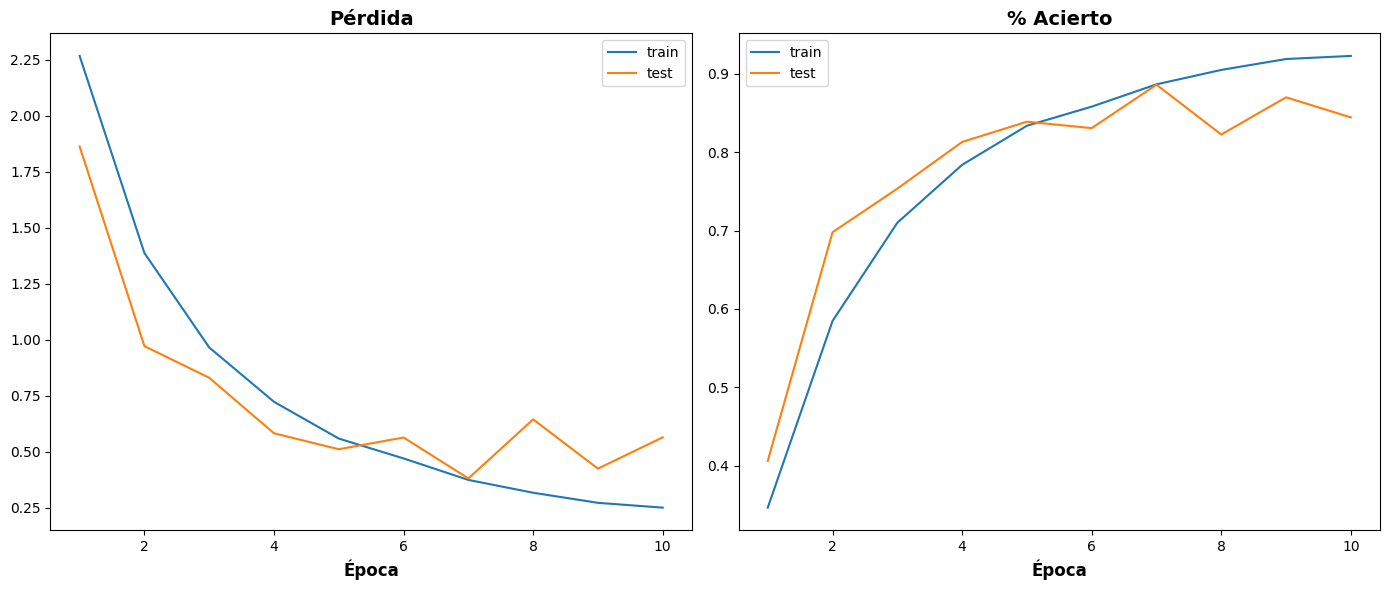

In [41]:
graficar_historial_entrenamiento(hist_sin_aug_5)

In [42]:
df_metricas_red_sin_augmentation_5 = crear_df_metricas(hist_sin_aug_5, "Quinta_red_sin_aug")

Métrica  Quinta_red_sin_aug
0       accuracy            0.922464
1           loss            0.250764
2      precision            0.945035
3         recall            0.906470
4   val_accuracy            0.844169
5       val_loss            0.564753
6  val_precision            0.876292
7     val_recall            0.826007

*pequeña conclucion

*pequeña conclucion

*pequeña conclucion

#Comparacion de modelos sin data aug


In [43]:
modelos_data_sin_aug = [
    {
        'Nombre': 'Primera red sin aug','Capas Convolucionales': '1 (32, 3×3)','Capas MaxPooling': '1 (2×2)','Batch Normalization': 'No','Capas Ocultas': '5 (512, 256, 128, 64, 32)','Dropout': '5 (4×0.3, 1×0.35)',
        **metricas(hist_sin_aug)
    },
    {
        'Nombre': 'Segunda red sin aug','Capas Convolucionales': '2 (32, 64, 3×3)','Capas MaxPooling': '2 (2×2)','Batch Normalization': 'No','Capas Ocultas': '5 (512, 256, 128, 64, 32)','Dropout': '5 (4×0.3, 1×0.35)',
        **metricas(hist_sin_aug_2)
    },
    {
        'Nombre': 'Tercera red sin aug','Capas Convolucionales': '3 (32, 64, 128, 3×3)','Capas MaxPooling': '3 (2×2)','Batch Normalization': 'No','Capas Ocultas': '2 (256, 128)','Dropout': '3 (2×0.4, 1×0.3)',
        **metricas(hist_sin_aug_3)
    },
    {
        'Nombre': 'Cuarta red sin aug','Capas Convolucionales': '3 (32, 64, 128, 3×3)','Capas MaxPooling': '3 (2×2)','Batch Normalization': '5 capas','Capas Ocultas': '2 (256, 128)','Dropout': '3 (2×0.4, 1×0.3)',
        **metricas(hist_sin_aug_4)
    },
    {
        'Nombre': 'Quinta red sin aug','Capas Convolucionales': '4 (32, 64, 128, 128, 3×3)','Capas MaxPooling': '4 (2×2)','Batch Normalization': '6 capas','Capas Ocultas': '2 (256, 128)','Dropout': '3 (2×0.4, 1×0.3)',
        **metricas(hist_sin_aug_5)
    }
]

modelos_sin_aug = pd.DataFrame(modelos_data_sin_aug)

modelos_sin_aug

Nombre      Capas Convolucionales Capas MaxPooling  \
0  Primera red sin aug                1 (32, 3×3)          1 (2×2)   
1  Segunda red sin aug            2 (32, 64, 3×3)          2 (2×2)   
2  Tercera red sin aug       3 (32, 64, 128, 3×3)          3 (2×2)   
3   Cuarta red sin aug       3 (32, 64, 128, 3×3)          3 (2×2)   
4   Quinta red sin aug  4 (32, 64, 128, 128, 3×3)          4 (2×2)   

  Batch Normalization              Capas Ocultas            Dropout  \
0                  No  5 (512, 256, 128, 64, 32)  5 (4×0.3, 1×0.35)   
1                  No  5 (512, 256, 128, 64, 32)  5 (4×0.3, 1×0.35)   
2                  No               2 (256, 128)   3 (2×0.4, 1×0.3)   
3             5 capas               2 (256, 128)   3 (2×0.4, 1×0.3)   
4             6 capas               2 (256, 128)   3 (2×0.4, 1×0.3)   

  Train Accuracy Validation Accuracy Train Loss Validation Loss  
0         0.7856              0.6331     0.6277          1.4241  
1         0.7421              0.7004     0.8029          1.0556  
2         0.8950              0.8626     0.3361          0.4856  
3         0.9223              0.8155     0.2415          0.6851  
4         0.9225              0.8442     0.2508          0.5648

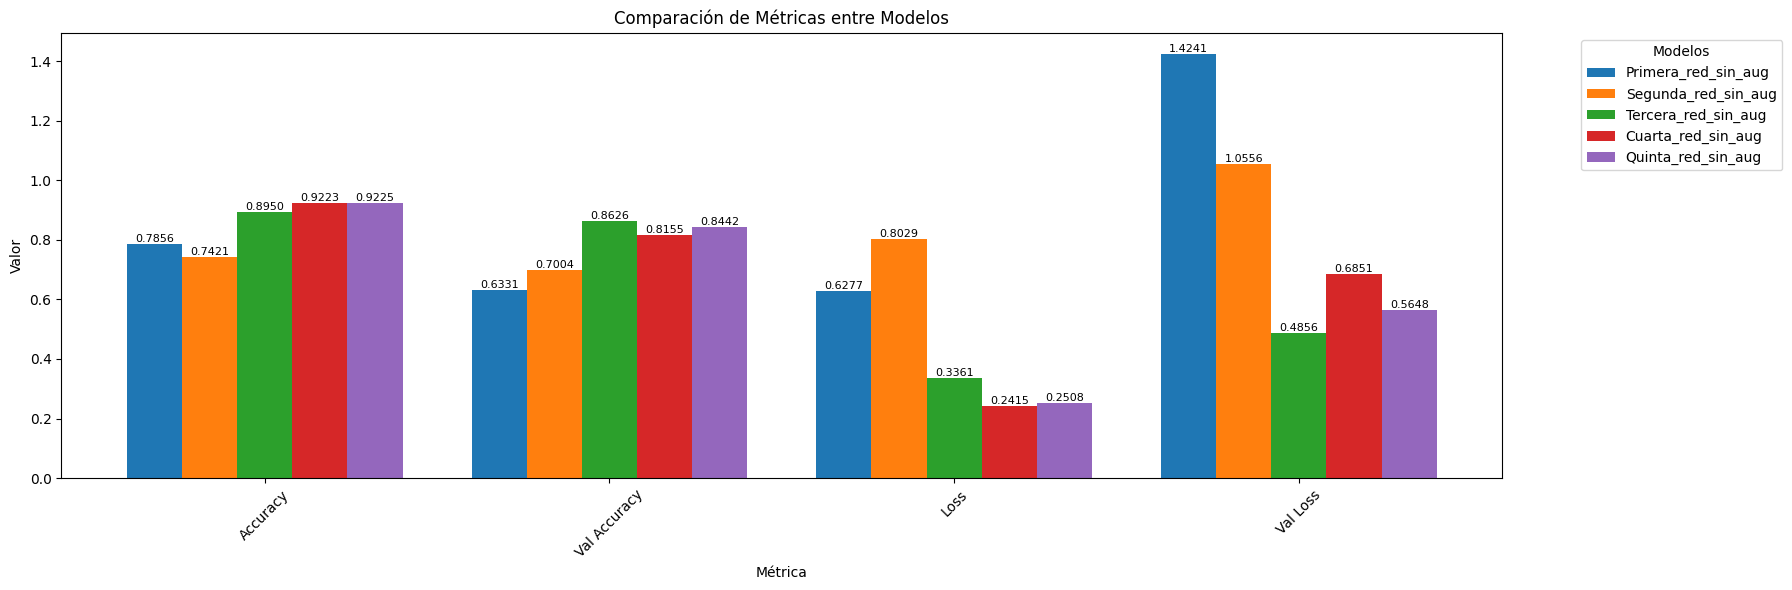

In [44]:
historiales = [
    hist_sin_aug.history,
    hist_sin_aug_2.history,
    hist_sin_aug_3.history,
    hist_sin_aug_4.history,
    hist_sin_aug_5.history
]

nombres_modelos = [
    'Primera_red_sin_aug',
    'Segunda_red_sin_aug',
    'Tercera_red_sin_aug',
    'Cuarta_red_sin_aug',
    'Quinta_red_sin_aug'
]

df_resultado = graficar_comparacion_modelos(historiales, nombres_modelos)

In [78]:
modelos = [red_sin_augmentation, red_sin_augmentation_2, red_sin_augmentation_3, red_sin_augmentation_4, red_sin_augmentation_5]

val_accuracies = [h['val_accuracy'][-1] for h in historiales]

indice_mejor = val_accuracies.index(max(val_accuracies))

mejor_modelo = modelos_2[indice_mejor]
nombre_mejor_modelo = mejor_modelo.name
hist_mejor = historiales[indice_mejor]

acc = hist_mejor['accuracy'][-1]
val_acc = hist_mejor['val_accuracy'][-1]
loss = hist_mejor['loss'][-1]
val_loss = hist_mejor['val_loss'][-1]
recall = hist_mejor['recall'][-1]
val_recall = hist_mejor['val_recall'][-1]
precision = hist_mejor['precision'][-1]
val_precision = hist_mejor['val_precision'][-1]
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
val_f1_score = 2 * (val_precision * val_recall) / (val_precision + val_recall) if (val_precision + val_recall) > 0 else 0


print(f"Mejor modelo según mayor Val Accuracy:")
print(f"Modelo:         {nombre_mejor_modelo}")
print(f"Accuracy:       {acc:.4f}")
print(f"Val Accuracy:   {val_acc:.4f}")
print(f"Loss:           {loss:.4f}")
print(f"Val Loss:       {val_loss:.4f}")
print(f"Recall:         {recall:.4f}")
print(f"val_Recall:     {val_recall:.4f}")
print(f"Precision:      {precision:.4f}")
print(f"val_Precision:  {val_precision:.4f}")
print(f"F1 Score:       {f1_score:.4f}")
print(f"val_F1 Score:   {val_f1_score:.4f}")

mejor_modelo.save("modelo_mejor.keras")

Mejor modelo según mayor Val Accuracy:
Modelo:         Tercera_red_con_aug
Accuracy:       0.8950
Val Accuracy:   0.8626
Loss:           0.3361
Val Loss:       0.4856
Recall:         0.8648
val_Recall:     0.8286
Precision:      0.9311
val_Precision:  0.9075
F1 Score:       0.8967
val_F1 Score:   0.8663


¨CONCLUCIONES MEJOR MODELO 1

¨CONCLUCIONES MEJOR MODELO 1

¨CONCLUCIONES MEJOR MODELO 1

Debemos borrar los datos generados sin data aug, como no los usaremos más, colab se queda sin memoria y debemos aumentarla para seguir con los modelos con data aug.

In [46]:
del X_train_noaug
del y_train_noaug
del X_val_noaug
del y_val_noaug
import gc
gc.collect()

12064

#Modelos con data AUG

##Modelo 1

In [47]:
red_con_augmentation = keras.Sequential(name="Primera_red_con_aug")
red_con_augmentation.add(Input(shape=(64, 64, 3), name="entrada"))

red_con_augmentation.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_con_augmentation.add(MaxPooling2D((2, 2), name="pooling_1"))

red_con_augmentation.add(Flatten(name="flatten_1"))

red_con_augmentation.add(Dropout(0.3, name="dropout_1"))
red_con_augmentation.add(Dense(512, activation='relu', name="CapaOculta_1"))
red_con_augmentation.add(Dropout(0.3, name="dropout_2"))
red_con_augmentation.add(Dense(256, activation='relu', name="CapaOculta_2"))
red_con_augmentation.add(Dense(128, activation='relu', name="CapaOculta_3"))
red_con_augmentation.add(Dropout(0.3, name="dropout_3"))
red_con_augmentation.add(Dense(64, activation='relu', name="CapaOculta_4"))
red_con_augmentation.add(Dropout(0.3, name="dropout_4"))
red_con_augmentation.add(Dense(32, activation='relu', name="CapaOculta_5"))
red_con_augmentation.add(Dropout(0.35, name="dropout_5"))
red_con_augmentation.add(Dense(18, activation='softmax', name="salida"))
red_con_augmentation.summary()

Model: "Primera_red_con_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_1 (Dense)            │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_2 (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_3 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_4 (Dense)            │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_5 (Dense)            │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │           594 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,953,778 (64.67 MB)

 Trainable params: 16,953,778 (64.67 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
np.random.seed(29)
tf.random.set_seed(29)

red_con_augmentation.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_con_aug = red_con_augmentation.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val,y_val)
)

Epoch 1/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.0880 - loss: 2.8545 - precision: 0.4877 - recall: 0.0114 - val_accuracy: 0.2701 - val_loss: 2.3316 - val_precision: 0.8536 - val_recall: 0.0678
Epoch 2/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.2858 - loss: 2.3072 - precision: 0.7763 - recall: 0.1137 - val_accuracy: 0.4494 - val_loss: 1.7945 - val_precision: 0.8944 - val_recall: 0.2420
Epoch 3/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4324 - loss: 1.8618 - precision: 0.8243 - recall: 0.2541 - val_accuracy: 0.5265 - val_loss: 1.5489 - val_precision: 0.8903 - val_recall: 0.3321
Epoch 4/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5172 - loss: 1.5641 - precision: 0.8573 - recall: 0.3404 - val_accuracy: 0.5663 - val_loss: 1.4232 - val_precision: 0.8896 - val_recall: 0.3816
Epoch 5/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5774 - loss: 1.3561 - precision: 0.8661 - recall: 0.4088 - val_accuracy: 0.6

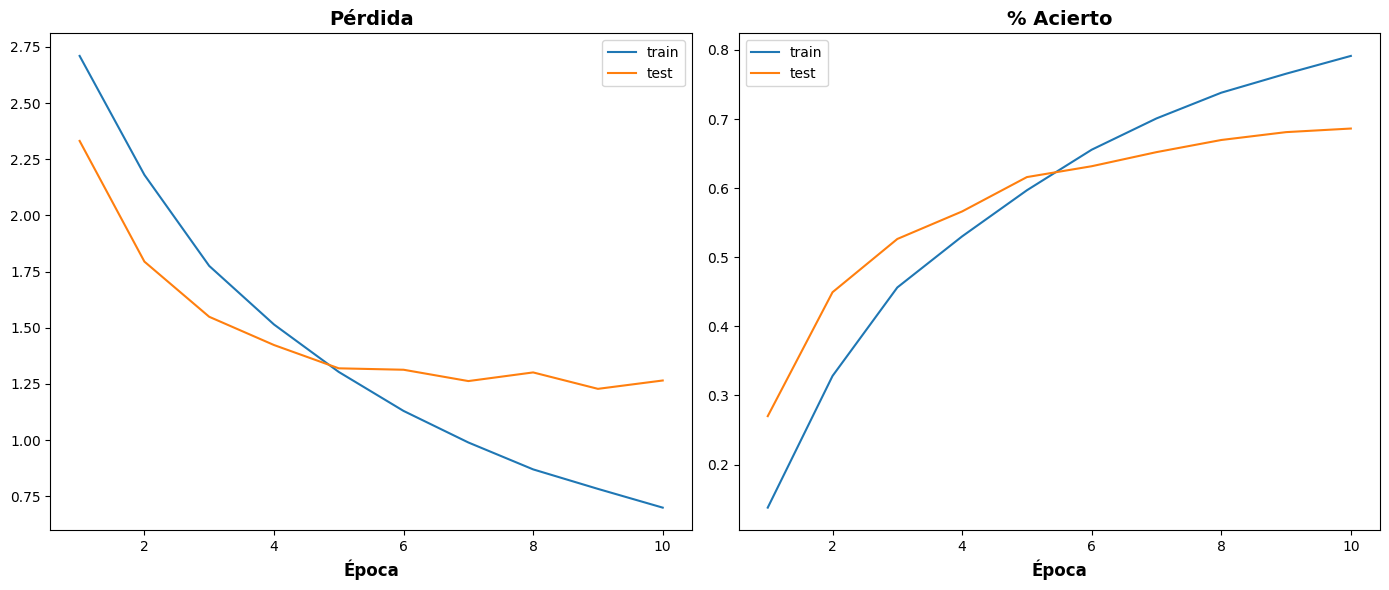

In [49]:
graficar_historial_entrenamiento(hist_con_aug)

In [50]:
df_metricas_red_con_augmentation = crear_df_metricas(hist_con_aug, "Primera_red_con_aug")

Métrica  Primera_red_con_aug
0       accuracy             0.791324
1           loss             0.699538
2      precision             0.892906
3         recall             0.704811
4   val_accuracy             0.686248
5       val_loss             1.265387
6  val_precision             0.821358
7     val_recall             0.619218

*pequeña conclucion

*pequeña conclucion

*pequeña conclucion

## Modelo 2

In [51]:
red_con_augmentation_2 = keras.Sequential(name="Segunda_red_con_aug")
red_con_augmentation_2.add(Input(shape=(64, 64, 3), name="entrada"))

red_con_augmentation_2.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_con_augmentation_2.add(MaxPooling2D((2, 2), name="pooling_1"))

red_con_augmentation_2.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
red_con_augmentation_2.add(MaxPooling2D((2, 2), name="pooling_2"))

red_con_augmentation_2.add(Flatten(name="flatten_1"))

red_con_augmentation_2.add(Dropout(0.3, name="dropout_1"))
red_con_augmentation_2.add(Dense(512, activation='relu', name="CapaOculta_1"))

red_con_augmentation_2.add(Dropout(0.3, name="dropout_2"))
red_con_augmentation_2.add(Dense(256, activation='relu', name="CapaOculta_2"))

red_con_augmentation_2.add(Dense(128, activation='relu', name="CapaOculta_3"))

red_con_augmentation_2.add(Dropout(0.3, name="dropout_3"))
red_con_augmentation_2.add(Dense(64, activation='relu', name="CapaOculta_4"))

red_con_augmentation_2.add(Dropout(0.3, name="dropout_4"))
red_con_augmentation_2.add(Dense(32, activation='relu', name="CapaOculta_5"))

red_con_augmentation_2.add(Dropout(0.35, name="dropout_5"))

red_con_augmentation_2.add(Dense(18, activation='softmax', name="salida"))

red_con_augmentation_2.summary()

Model: "Segunda_red_con_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_2 (Conv2D)          │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_1 (Dense)            │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_2 (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_3 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_4 (Dense)            │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_5 (Dense)            │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │           594 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,583,666 (32.74 MB)

 Trainable params: 8,583,666 (32.74 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
np.random.seed(29)
tf.random.set_seed(29)

red_con_augmentation_2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_con_aug_2 = red_con_augmentation_2.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val,y_val)
)

Epoch 1/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.1057 - loss: 2.7728 - precision: 0.4654 - recall: 0.0149 - val_accuracy: 0.3234 - val_loss: 2.0889 - val_precision: 0.8242 - val_recall: 0.1467
Epoch 2/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.3115 - loss: 2.1491 - precision: 0.7683 - recall: 0.1421 - val_accuracy: 0.4706 - val_loss: 1.6741 - val_precision: 0.8459 - val_recall: 0.2634
Epoch 3/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.4477 - loss: 1.7248 - precision: 0.8330 - recall: 0.2702 - val_accuracy: 0.5670 - val_loss: 1.3741 - val_precision: 0.8684 - val_recall: 0.3663
Epoch 4/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5444 - loss: 1.4252 - precision: 0.8530 - recall: 0.3618 - val_accuracy: 0.6268 - val_loss: 1.1994 - val_precision: 0.8658 - val_recall: 0.4525
Epoch 5/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6200 - loss: 1.2010 - precision: 0.8528 - recall: 0.4478 - val_accuracy: 0.6589

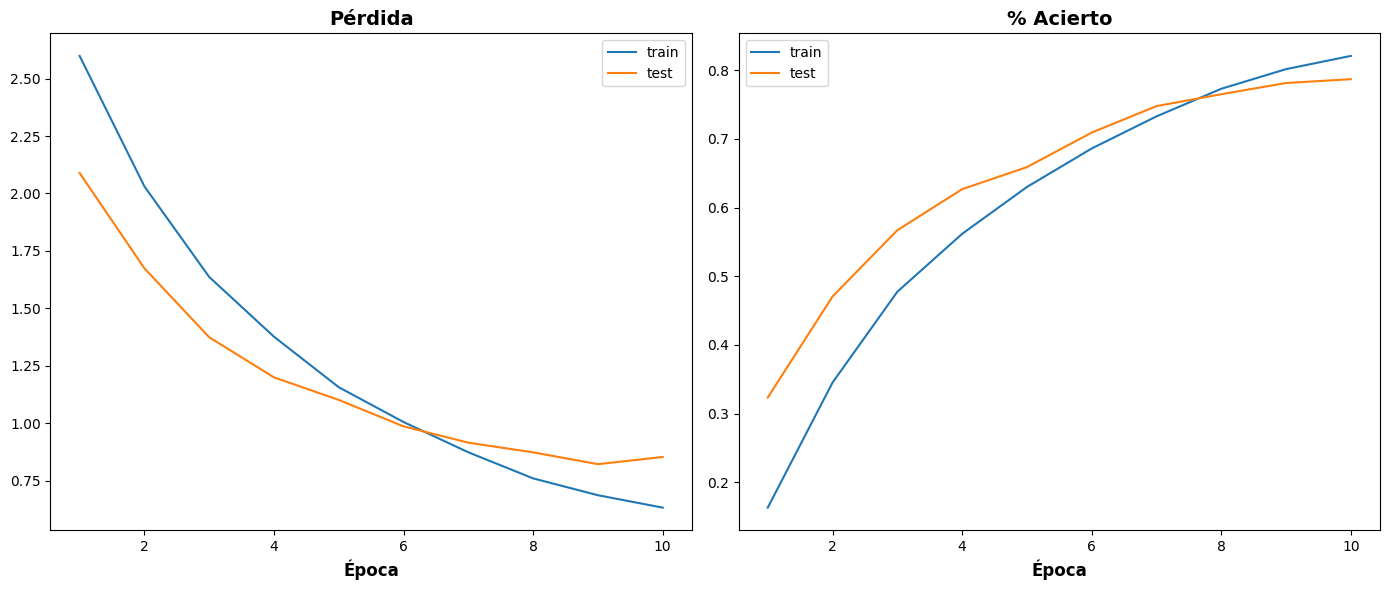

In [53]:
graficar_historial_entrenamiento(hist_con_aug_2)

In [54]:
df_metricas_red_sin_augmentation_2 = crear_df_metricas(hist_con_aug_2, "Segunda_red_con_aug")

Métrica  Segunda_red_con_aug
0       accuracy             0.820790
1           loss             0.632488
2      precision             0.911024
3         recall             0.744605
4   val_accuracy             0.786916
5       val_loss             0.852949
6  val_precision             0.880613
7     val_recall             0.732501

*pequeña conclucion

*pequeña conclucion

*pequeña conclucion

##Modelo 3

In [55]:
red_con_augmentation_3 = keras.Sequential(name="Tercera_red_con_aug")
red_con_augmentation_3.add(Input(shape=(64, 64, 3), name="entrada"))

red_con_augmentation_3.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_con_augmentation_3.add(MaxPooling2D((2, 2), name="pooling_1"))

red_con_augmentation_3.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
red_con_augmentation_3.add(MaxPooling2D((2, 2), name="pooling_2"))

red_con_augmentation_3.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_3"))
red_con_augmentation_3.add(MaxPooling2D((2, 2), name="pooling_3"))

red_con_augmentation_3.add(Flatten(name="flatten_1"))

red_con_augmentation_3.add(Dropout(0.4, name="dropout_1"))
red_con_augmentation_3.add(Dense(256, activation='relu', name="CapaOculta_1"))
red_con_augmentation_3.add(Dropout(0.4, name="dropout_2"))
red_con_augmentation_3.add(Dense(128, activation='relu', name="CapaOculta_2"))
red_con_augmentation_3.add(Dropout(0.3, name="dropout_3"))
red_con_augmentation_3.add(Dense(18, activation='softmax', name="salida"))

red_con_augmentation_3.summary()

Model: "Tercera_red_con_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_2 (Conv2D)          │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_3 (Conv2D)          │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_1 (Dense)            │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_2 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,225,874 (8.49 MB)

 Trainable params: 2,225,874 (8.49 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
np.random.seed(29)
tf.random.set_seed(29)

red_con_augmentation_3.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_con_aug_3 = red_con_augmentation_3.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val,y_val)
)

Epoch 1/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.2168 - loss: 2.4876 - precision: 0.6422 - recall: 0.0697 - val_accuracy: 0.6479 - val_loss: 1.2118 - val_precision: 0.9095 - val_recall: 0.4312
Epoch 2/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6176 - loss: 1.2617 - precision: 0.8270 - recall: 0.4601 - val_accuracy: 0.7668 - val_loss: 0.8071 - val_precision: 0.9113 - val_recall: 0.6327
Epoch 3/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7234 - loss: 0.8921 - precision: 0.8712 - recall: 0.6223 - val_accuracy: 0.8040 - val_loss: 0.6470 - val_precision: 0.9143 - val_recall: 0.7233
Epoch 4/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7829 - loss: 0.7073 - precision: 0.8879 - recall: 0.7064 - val_accuracy: 0.8494 - val_loss: 0.5120 - val_precision: 0.9281 - val_recall: 0.7889
Epoch 5/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8216 - loss: 0.5747 - precision: 0.9074 - recall: 0.7629 - val_accuracy: 0.8656 

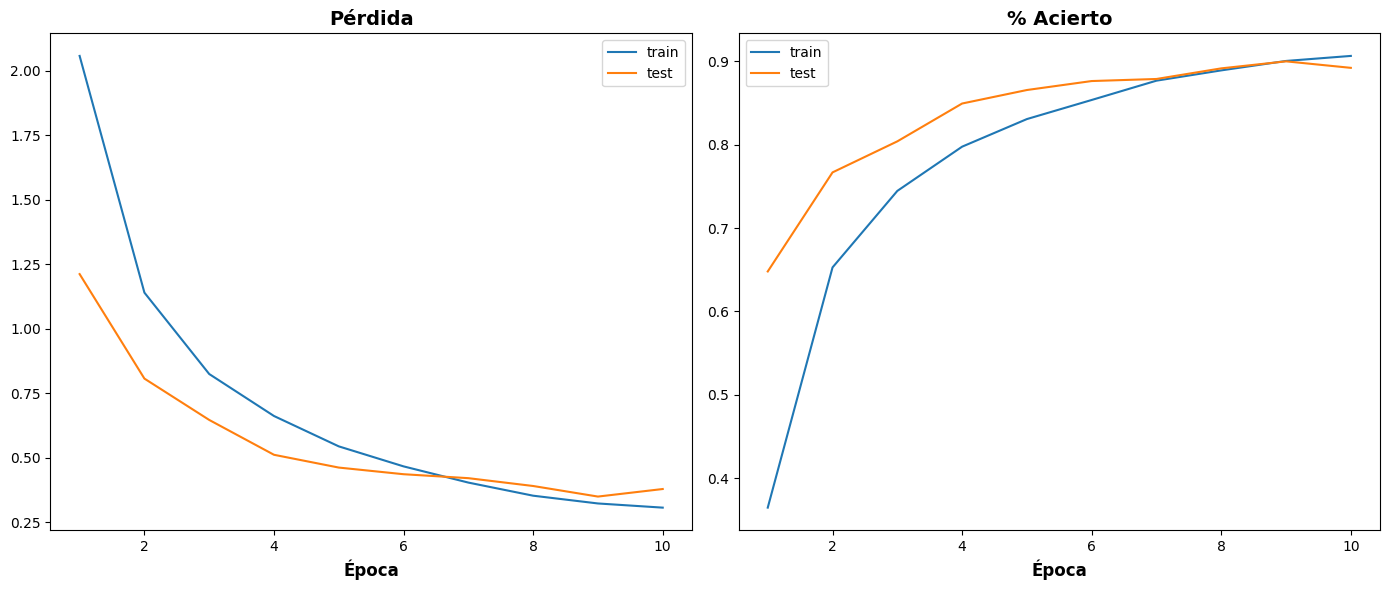

In [57]:
graficar_historial_entrenamiento(hist_con_aug_3)

In [58]:
df_metricas_red_sin_augmentation_3 = crear_df_metricas(hist_con_aug_3, "Tercera_red_con_aug")

Métrica  Tercera_red_con_aug
0       accuracy             0.906468
1           loss             0.307257
2      precision             0.938388
3         recall             0.879692
4   val_accuracy             0.892159
5       val_loss             0.379358
6  val_precision             0.933750
7     val_recall             0.868044

*pequeña conclucion

*pequeña conclucion

*pequeña conclucion

##Modelo 4

In [59]:
red_con_augmentation_4 = keras.Sequential(name="Cuarta_red_con_aug")
red_con_augmentation_4.add(Input(shape=(64, 64, 3), name="entrada"))

red_con_augmentation_4.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_con_augmentation_4.add(BatchNormalization(name="batchNormalization_1"))
red_con_augmentation_4.add(MaxPooling2D((2, 2), name="pooling_1"))

red_con_augmentation_4.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
red_con_augmentation_4.add(BatchNormalization(name="batchNormalization_2"))
red_con_augmentation_4.add(MaxPooling2D((2, 2), name="pooling_2"))

red_con_augmentation_4.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_3"))
red_con_augmentation_4.add(BatchNormalization(name="batchNormalization_3"))
red_con_augmentation_4.add(MaxPooling2D((2, 2), name="pooling_3"))

red_con_augmentation_4.add(Flatten(name="Flatten"))

red_con_augmentation_4.add(Dropout(0.4, name="dropout_1"))
red_con_augmentation_4.add(Dense(256, activation='relu', name="CapaOculta_1"))
red_con_augmentation_4.add(BatchNormalization(name="batchNormalization_4"))

red_con_augmentation_4.add(Dropout(0.4, name="dropout_2"))
red_con_augmentation_4.add(Dense(128, activation='relu', name="CapaOculta_2"))
red_con_augmentation_4.add(BatchNormalization(name="batchNormalization_5"))

red_con_augmentation_4.add(Dropout(0.3, name="dropout_3"))
red_con_augmentation_4.add(Dense(18, activation='softmax', name="salida"))

red_con_augmentation_4.summary()

Model: "Cuarta_red_con_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_1            │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_2 (Conv2D)          │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_2            │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_3 (Conv2D)          │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_3            │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_1 (Dense)            │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_4            │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_2 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_5            │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,228,306 (8.50 MB)

 Trainable params: 2,227,090 (8.50 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [60]:
np.random.seed(29)
tf.random.set_seed(29)

red_con_augmentation_4.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_con_aug_4 = red_con_augmentation_4.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val,y_val)
)

Epoch 1/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.3476 - loss: 2.3221 - precision: 0.5569 - recall: 0.1950 - val_accuracy: 0.6605 - val_loss: 1.1298 - val_precision: 0.8563 - val_recall: 0.5194
Epoch 2/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6738 - loss: 1.1019 - precision: 0.8369 - recall: 0.5555 - val_accuracy: 0.7799 - val_loss: 0.7282 - val_precision: 0.8854 - val_recall: 0.6959
Epoch 3/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7910 - loss: 0.7033 - precision: 0.8875 - recall: 0.7151 - val_accuracy: 0.8438 - val_loss: 0.5249 - val_precision: 0.9013 - val_recall: 0.8010
Epoch 4/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8372 - loss: 0.5292 - precision: 0.9027 - recall: 0.7940 - val_accuracy: 0.8400 - val_loss: 0.5290 - val_precision: 0.9017 - val_recall: 0.7966
Epoch 5/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8785 - loss: 0.3999 - precision: 0.9230 - recall: 0.8451 - val_accuracy: 0.8443 

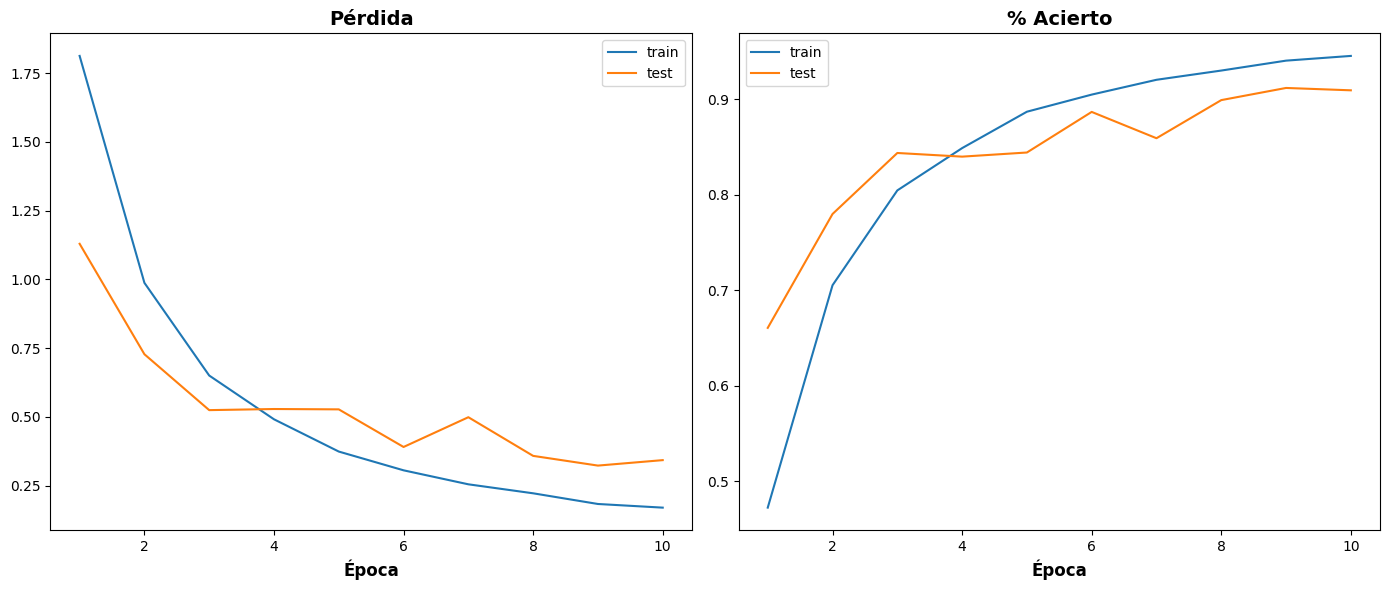

In [61]:
graficar_historial_entrenamiento(hist_con_aug_4)

In [62]:
df_metricas_red_sin_augmentation_4 = crear_df_metricas(hist_con_aug_4, "Cuarta_red_con_aug")

Métrica  Cuarta_red_con_aug
0       accuracy            0.945520
1           loss            0.170357
2      precision            0.956836
3         recall            0.936275
4   val_accuracy            0.909473
5       val_loss            0.343094
6  val_precision            0.925474
7     val_recall            0.899951

*pequeña conclucion

*pequeña conclucion

*pequeña conclucion

##Modelo 5

In [63]:
red_con_augmentation_5 = keras.Sequential(name="Quinta_red_con_aug")
red_con_augmentation_5.add(Input(shape=(64, 64, 3), name="entrada"))

red_con_augmentation_5.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_con_augmentation_5.add(BatchNormalization(name="batchNormalization_1"))
red_con_augmentation_5.add(MaxPooling2D((2, 2), name="pooling_1"))

red_con_augmentation_5.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
red_con_augmentation_5.add(BatchNormalization(name="batchNormalization_2"))
red_con_augmentation_5.add(MaxPooling2D((2, 2), name="pooling_2"))

red_con_augmentation_5.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_3"))
red_con_augmentation_5.add(BatchNormalization(name="batchNormalization_3"))
red_con_augmentation_5.add(MaxPooling2D((2, 2), name="pooling_3"))

red_con_augmentation_5.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_4"))
red_con_augmentation_5.add(BatchNormalization(name="batchNormalization_4"))
red_con_augmentation_5.add(MaxPooling2D((2, 2), name="pooling_4"))

red_con_augmentation_5.add(Flatten(name="Flatten"))

red_con_augmentation_5.add(Dropout(0.4, name="dropout_1"))
red_con_augmentation_5.add(Dense(256, activation='relu', name="CapaOculta_1"))
red_con_augmentation_5.add(BatchNormalization(name="batchNormalization_5"))

red_con_augmentation_5.add(Dropout(0.4, name="dropout_2"))
red_con_augmentation_5.add(Dense(128, activation='relu', name="CapaOculta_2"))
red_con_augmentation_5.add(BatchNormalization(name="batchNormalization_6"))

red_con_augmentation_5.add(Dropout(0.3, name="dropout_3"))
red_con_augmentation_5.add(Dense(18, activation='softmax', name="salida"))

red_con_augmentation_5.summary()

Model: "Quinta_red_con_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_1            │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_2 (Conv2D)          │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_2            │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_3 (Conv2D)          │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_3            │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_4 (Conv2D)          │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_4            │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_4 (MaxPooling2D)        │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_1 (Dense)            │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_5            │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_2 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_6            │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 803,538 (3.07 MB)

 Trainable params: 802,066 (3.06 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [64]:
np.random.seed(29)
tf.random.set_seed(29)

red_con_augmentation_5.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_con_aug_5 = red_con_augmentation_5.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val,y_val)
)

Epoch 1/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.3174 - loss: 2.4227 - precision: 0.5269 - recall: 0.1718 - val_accuracy: 0.6900 - val_loss: 1.0319 - val_precision: 0.8832 - val_recall: 0.5451
Epoch 2/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6967 - loss: 1.0122 - precision: 0.8376 - recall: 0.5844 - val_accuracy: 0.7946 - val_loss: 0.7065 - val_precision: 0.9177 - val_recall: 0.6814
Epoch 3/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8140 - loss: 0.6191 - precision: 0.8927 - recall: 0.7580 - val_accuracy: 0.8375 - val_loss: 0.5371 - val_precision: 0.9053 - val_recall: 0.7885
Epoch 4/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8647 - loss: 0.4608 - precision: 0.9161 - recall: 0.8268 - val_accuracy: 0.8737 - val_loss: 0.4212 - val_precision: 0.9170 - val_recall: 0.8470
Epoch 5/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8902 - loss: 0.3596 - precision: 0.9291 - recall: 0.8631 - val_accuracy: 0.8976 

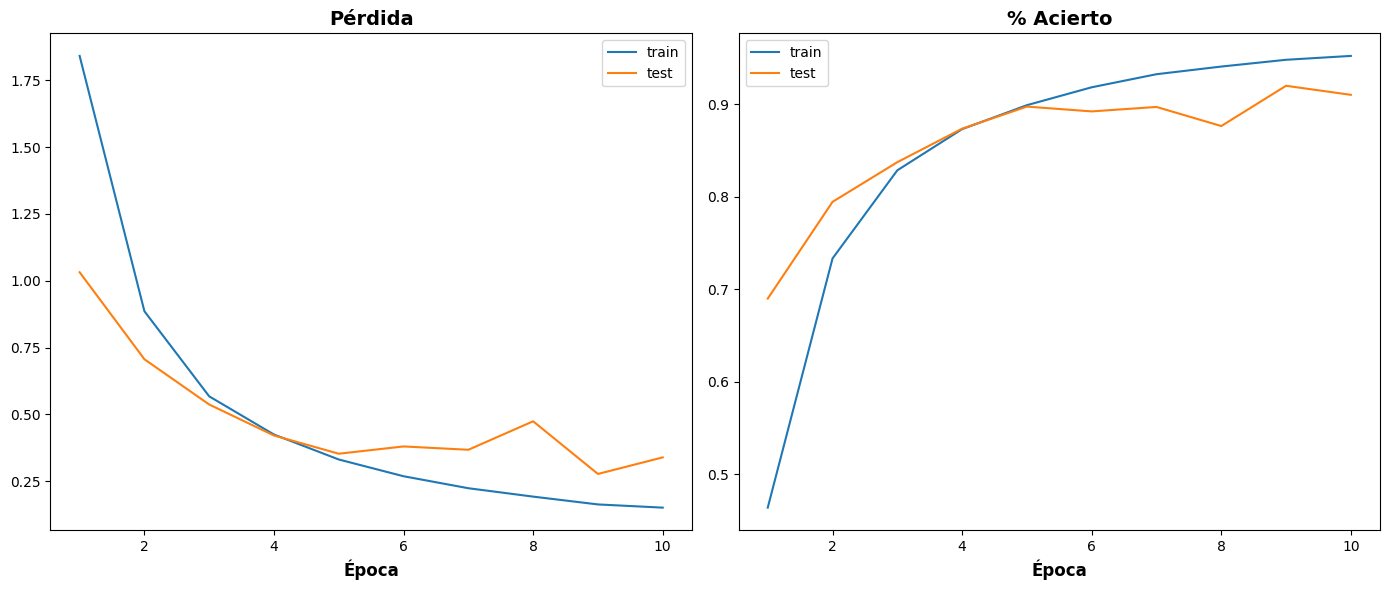

In [65]:
graficar_historial_entrenamiento(hist_con_aug_5)

In [66]:
df_metricas_red_sin_augmentation_5 = crear_df_metricas(hist_con_aug_5, "Quinta_red_con_aug")

Métrica  Quinta_red_con_aug
0       accuracy            0.952415
1           loss            0.151297
2      precision            0.964244
3         recall            0.943881
4   val_accuracy            0.910339
5       val_loss            0.339314
6  val_precision            0.926947
7     val_recall            0.902300

#Comparacion de modelos con data aug

In [67]:
modelos_data_con_aug = [
    {
        'Nombre': 'Primera red con aug','Capas Convolucionales': '1 (32, 3×3)','Capas MaxPooling': '1 (2×2)','Batch Normalization': 'No','Capas Ocultas': '5 (512, 256, 128, 64, 32)','Dropout': '5 (4×0.3, 1×0.35)',
        **metricas(hist_con_aug)
    },
    {
        'Nombre': 'Segunda red con aug','Capas Convolucionales': '2 (32, 64, 3×3)','Capas MaxPooling': '2 (2×2)','Batch Normalization': 'No','Capas Ocultas': '5 (512, 256, 128, 64, 32)','Dropout': '5 (4×0.3, 1×0.35)',
        **metricas(hist_con_aug_2)
    },
    {
        'Nombre': 'Tercera red con aug','Capas Convolucionales': '3 (32, 64, 128, 3×3)','Capas MaxPooling': '3 (2×2)','Batch Normalization': 'No','Capas Ocultas': '2 (256, 128)','Dropout': '3 (2×0.4, 1×0.3)',
        **metricas(hist_con_aug_3)
    },
    {
        'Nombre': 'Cuarta red con aug','Capas Convolucionales': '3 (32, 64, 128, 3×3)','Capas MaxPooling': '3 (2×2)','Batch Normalization': '5 capas','Capas Ocultas': '2 (256, 128)','Dropout': '3 (2×0.4, 1×0.3)',
        **metricas(hist_con_aug_4)
    },
    {
        'Nombre': 'Quinta red con aug','Capas Convolucionales': '4 (32, 64, 128, 128, 3×3)','Capas MaxPooling': '4 (2×2)','Batch Normalization': '6 capas','Capas Ocultas': '2 (256, 128)','Dropout': '3 (2×0.4, 1×0.3)',
        **metricas(hist_con_aug_5)
    }
]

modelos_con_aug = pd.DataFrame(modelos_data_con_aug)

modelos_con_aug

Nombre      Capas Convolucionales Capas MaxPooling  \
0  Primera red con aug                1 (32, 3×3)          1 (2×2)   
1  Segunda red con aug            2 (32, 64, 3×3)          2 (2×2)   
2  Tercera red con aug       3 (32, 64, 128, 3×3)          3 (2×2)   
3   Cuarta red con aug       3 (32, 64, 128, 3×3)          3 (2×2)   
4   Quinta red con aug  4 (32, 64, 128, 128, 3×3)          4 (2×2)   

  Batch Normalization              Capas Ocultas            Dropout  \
0                  No  5 (512, 256, 128, 64, 32)  5 (4×0.3, 1×0.35)   
1                  No  5 (512, 256, 128, 64, 32)  5 (4×0.3, 1×0.35)   
2                  No               2 (256, 128)   3 (2×0.4, 1×0.3)   
3             5 capas               2 (256, 128)   3 (2×0.4, 1×0.3)   
4             6 capas               2 (256, 128)   3 (2×0.4, 1×0.3)   

  Train Accuracy Validation Accuracy Train Loss Validation Loss  
0         0.7913              0.6862     0.6995          1.2654  
1         0.8208              0.7869     0.6325          0.8529  
2         0.9065              0.8922     0.3073          0.3794  
3         0.9455              0.9095     0.1704          0.3431  
4         0.9524              0.9103     0.1513          0.3393

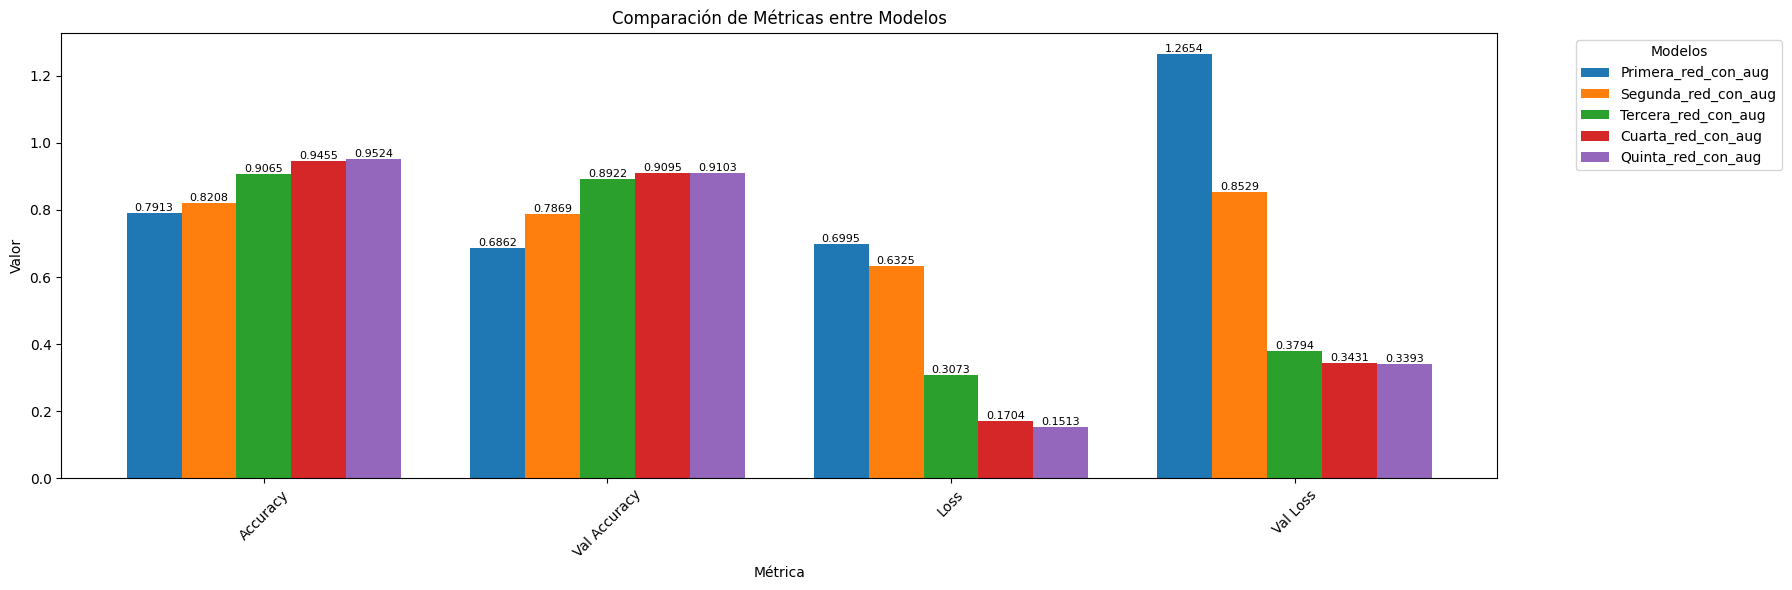

In [68]:
historiales_2 = [
    hist_con_aug.history,
    hist_con_aug_2.history,
    hist_con_aug_3.history,
    hist_con_aug_4.history,
    hist_con_aug_5.history
]

nombres_modelos_2 = [
    'Primera_red_con_aug',
    'Segunda_red_con_aug',
    'Tercera_red_con_aug',
    'Cuarta_red_con_aug',
    'Quinta_red_con_aug'
]

df_resultado_2 = graficar_comparacion_modelos(historiales_2, nombres_modelos_2)

In [77]:
modelos_2 = [red_con_augmentation, red_con_augmentation_2, red_con_augmentation_3, red_con_augmentation_4, red_con_augmentation_5]

val_accuracies = [h['val_accuracy'][-1] for h in historiales_2]

indice_mejor = val_accuracies.index(max(val_accuracies))

mejor_modelo = modelos_2[indice_mejor]
nombre_mejor_modelo = mejor_modelo.name
hist_mejor = historiales_2[indice_mejor]

acc = hist_mejor['accuracy'][-1]
val_acc = hist_mejor['val_accuracy'][-1]
loss = hist_mejor['loss'][-1]
val_loss = hist_mejor['val_loss'][-1]
recall = hist_mejor['recall'][-1]
val_recall = hist_mejor['val_recall'][-1]
precision = hist_mejor['precision'][-1]
val_precision = hist_mejor['val_precision'][-1]
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
val_f1_score = 2 * (val_precision * val_recall) / (val_precision + val_recall) if (val_precision + val_recall) > 0 else 0


print(f"Mejor modelo según mayor Val Accuracy:")
print(f"Modelo:         {nombre_mejor_modelo}")
print(f"Accuracy:       {acc:.4f}")
print(f"Val Accuracy:   {val_acc:.4f}")
print(f"Loss:           {loss:.4f}")
print(f"Val Loss:       {val_loss:.4f}")
print(f"Recall:         {recall:.4f}")
print(f"val_Recall:     {val_recall:.4f}")
print(f"Precision:      {precision:.4f}")
print(f"val_Precision:  {val_precision:.4f}")
print(f"F1 Score:       {f1_score:.4f}")
print(f"val_F1 Score:   {val_f1_score:.4f}")

mejor_modelo_2.save("modelo_mejor_2.keras")

Mejor modelo según mayor Val Accuracy:
Modelo:         Quinta_red_con_aug
Accuracy:       0.9524
Val Accuracy:   0.9103
Loss:           0.1513
Val Loss:       0.3393
Recall:         0.9439
val_Recall:     0.9023
Precision:      0.9642
val_Precision:  0.9269
F1 Score:       0.9540
val_F1 Score:   0.9145


¨CONCLUCIONES MEJOR MODELO 2

¨CONCLUCIONES MEJOR MODELO 2

¨CONCLUCIONES MEJOR MODELO 2

#Mejor modelo : SIN VS CON DATA AUG

In [70]:
los_val_acc_combinados = pd.concat([valores_val_accuracy, valores_val_accuracy_2], ignore_index=False)
los_val_acc_combinados.index = list(valores_val_accuracy.index) + list(valores_val_accuracy_2.index)

mejor_modelo_general = los_val_acc_combinados['Val Accuracy'].idxmax()
mejor_val_accuracy_general = los_val_acc_combinados['Val Accuracy'].max()

print(f"El mejor modelo en general según 'val_accuracy' es: {mejor_modelo_general} con un valor de {mejor_val_accuracy_general:.4f}")

print(f"El mejor modelo sin data augmentation es: {mejor_modelo}")
print(f"El mejor modelo con data augmentation es: {mejor_modelo_2}")

El mejor modelo en general según 'val_accuracy' es: Quinta_red_con_aug con un valor de 0.9103
El mejor modelo sin data augmentation es: Tercera_red_sin_aug
El mejor modelo con data augmentation es: Quinta_red_con_aug


In [72]:
model_dict = {
    'Primera_red_sin_aug': red_sin_augmentation,
    'Segunda_red_sin_aug': red_sin_augmentation_2,
    'Tercera_red_sin_aug': red_sin_augmentation_3,
    'Cuarta_red_sin_aug': red_sin_augmentation_4,
    'Quinta_red_sin_aug': red_sin_augmentation_5,
    'Primera_red_con_aug': red_con_augmentation,
    'Segunda_red_con_aug': red_con_augmentation_2,
    'Tercera_red_con_aug': red_con_augmentation_3,
    'Cuarta_red_con_aug': red_con_augmentation_4,
    'Quinta_red_con_aug': red_con_augmentation_5,
}

best_model = model_dict[mejor_modelo_general]

best_model.save(f'{mejor_modelo_general}.keras')

print(f"El mejor modelo general '{mejor_modelo_general}' ha sido guardado como '{mejor_modelo_general}.keras'")

El mejor modelo general 'Quinta_red_con_aug' ha sido guardado como 'Quinta_red_con_aug.keras'


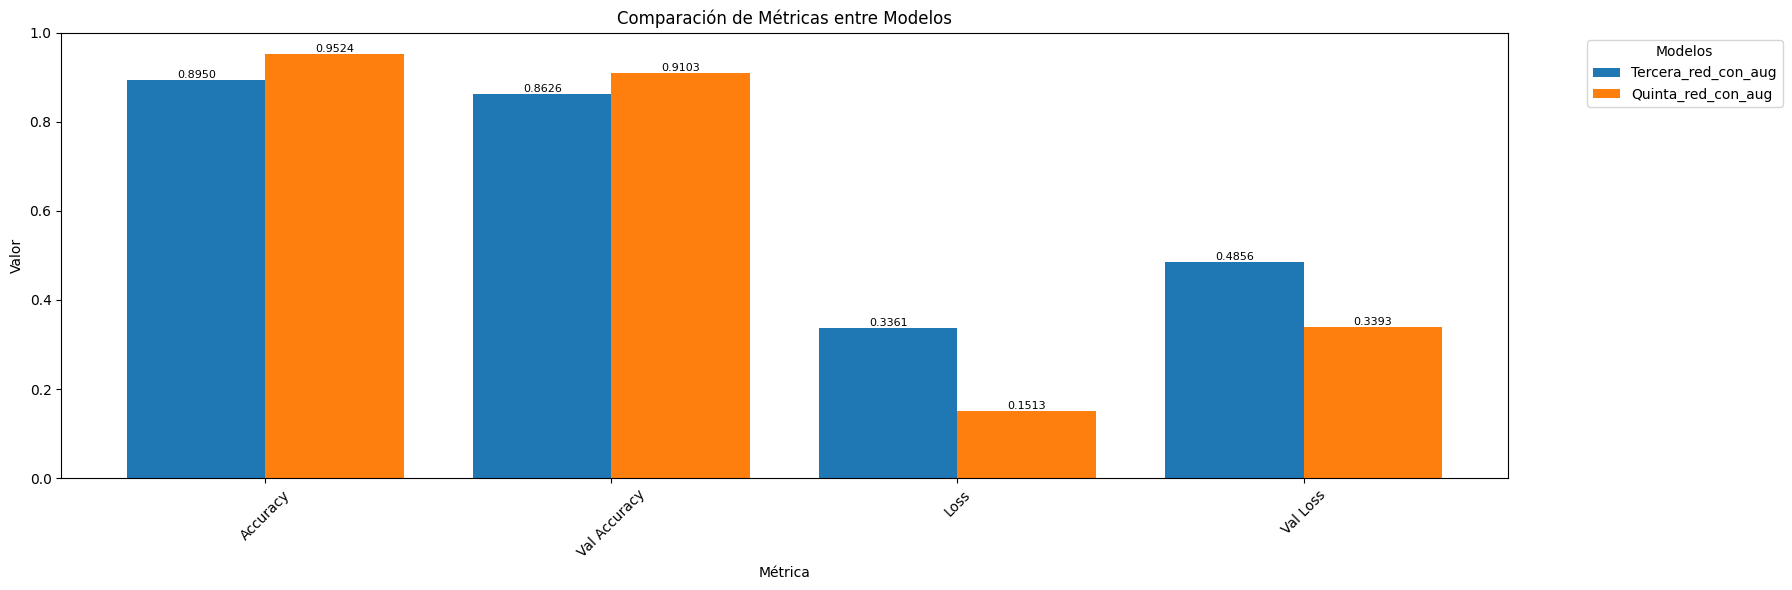

In [80]:
historiales_3 = [
    hist_sin_aug_3.history,
    hist_con_aug_5.history
]

nombres_modelos_3 = [
    'Tercera_red_con_aug',
    'Quinta_red_con_aug'
]

df_resultado_3 = graficar_comparacion_modelos(historiales_3, nombres_modelos_3)

#Mejor modelo: opinion de los analistas

Si bien la Quinta_red_con_aug es la que presenta mejores metricas, este modelo sufre de sobre entranmiento ya que la diferencia entre acurracy en train y test es de 0.0421 a comparacion del modelo Tercera_red_con_aug que tiene una difencia de 0.0143 la cual es mucho menor, asi que visto las metricas tambien se podria conciderar este modelo si es muy preocupante el grado de sobre entrenamiento.

In [82]:
red_con_augmentation_3.save("Tercera_red_con_aug.keras")

In [83]:
cargarmodel = load_model('Tercera_red_con_aug.keras')

prediccion = cargarmodel.evaluate(X_test, y_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9495 - loss: 0.1641 - precision: 0.9739 - recall: 0.9325


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━

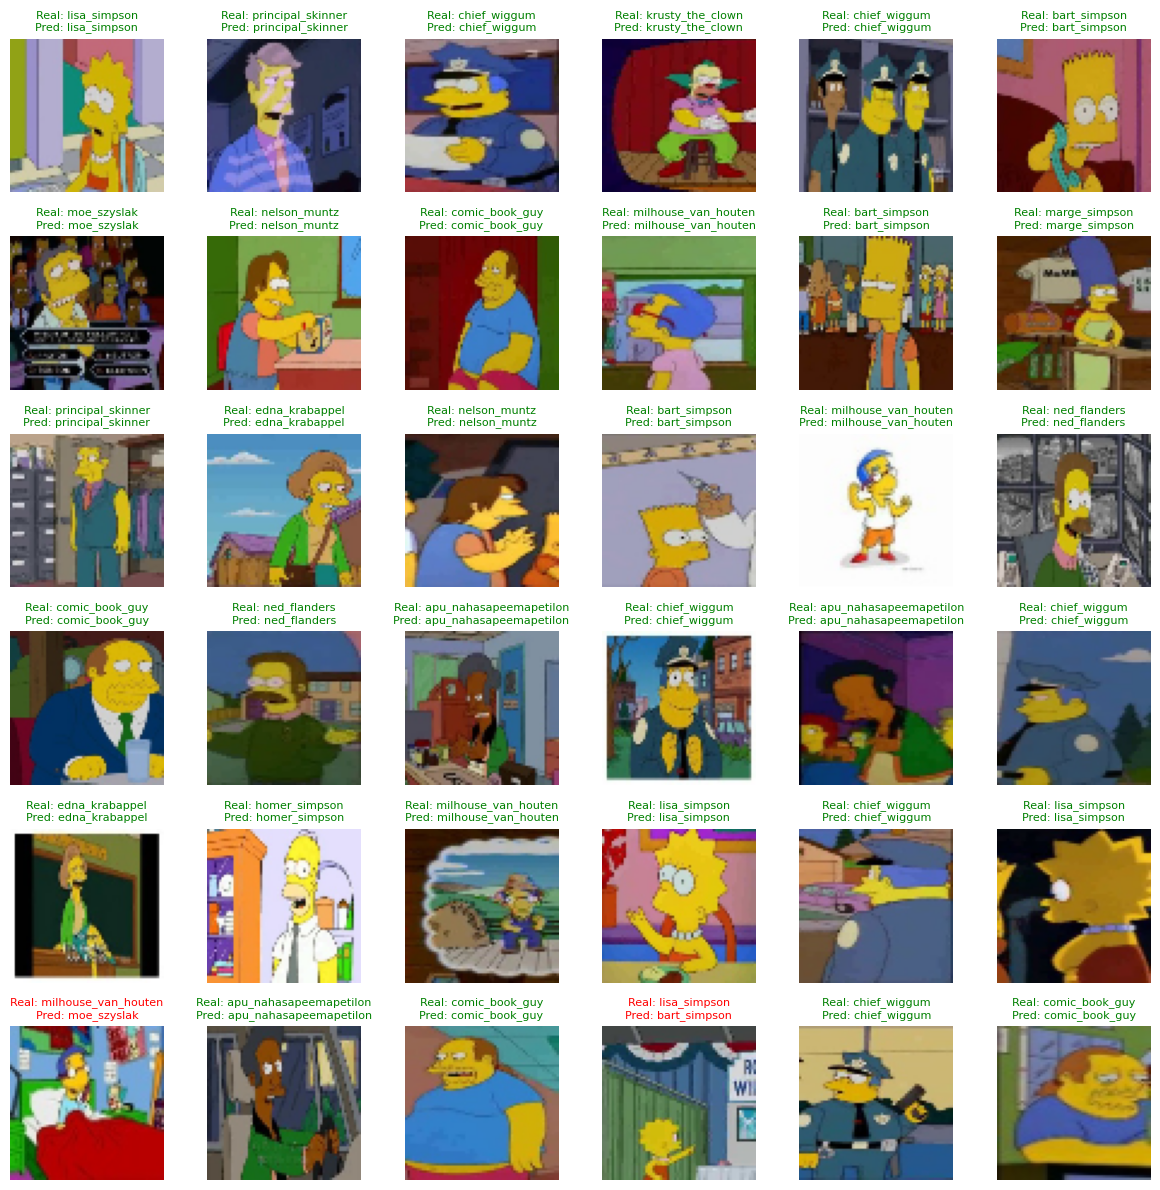

In [84]:
num_images = 36
cols = 6
rows = (num_images + cols - 1) // cols

plt.figure(figsize=(cols * 2, rows * 2))

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(cv2.cvtColor((X_test[i] * 255).astype("uint8"), cv2.COLOR_BGR2RGB))
    plt.axis('off')

    true_class_index = np.argmax(y_test[i])
    pred_class_index = np.argmax(cargarmodel.predict(X_test[i:i + 1])[0])

    true_label = MAP_CHARACTERS[true_class_index]
    pred_label = MAP_CHARACTERS[pred_class_index]
    color = "green" if true_class_index == pred_class_index else "red"

    # Etiquetas en líneas separadas
    plt.title(f"Real: {true_label}\nPred: {pred_label}", color=color, fontsize=8)

plt.tight_layout()
plt.show()


#Predicciones

In [73]:
from tensorflow.keras.models import load_model

cargarmodel = load_model('Quinta_red_con_aug.keras')

prediccion = cargarmodel.evaluate(X_test, y_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9361 - loss: 0.2237 - precision: 0.9500 - recall: 0.9341


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━

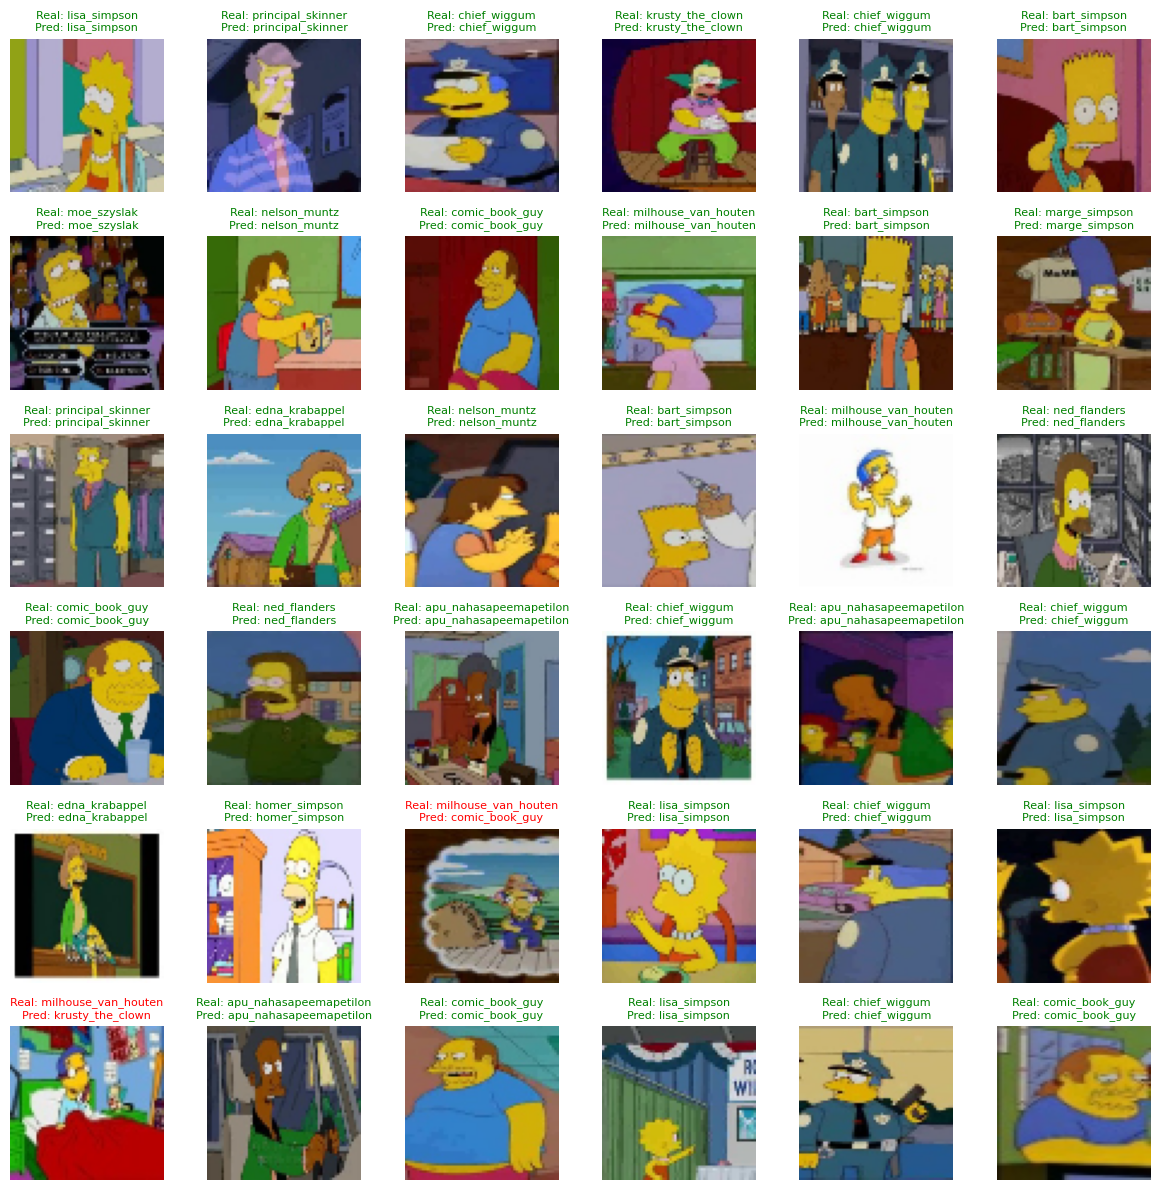

In [74]:
num_images = 36
cols = 6
rows = (num_images + cols - 1) // cols

plt.figure(figsize=(cols * 2, rows * 2))

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(cv2.cvtColor((X_test[i] * 255).astype("uint8"), cv2.COLOR_BGR2RGB))
    plt.axis('off')

    true_class_index = np.argmax(y_test[i])
    pred_class_index = np.argmax(cargarmodel.predict(X_test[i:i + 1])[0])

    true_label = MAP_CHARACTERS[true_class_index]
    pred_label = MAP_CHARACTERS[pred_class_index]
    color = "green" if true_class_index == pred_class_index else "red"

    # Etiquetas en líneas separadas
    plt.title(f"Real: {true_label}\nPred: {pred_label}", color=color, fontsize=8)

plt.tight_layout()
plt.show()


#Concluciones

1. Problemas con la ram:

2. Errores en la predicciones:

3. Mejor modelo:

4. Propuestas de arquitecturas o algo relacionado a las arquitecturas:

5. importancia del data aug, aunque sin ella igual se logro resultados optimos, no mejores pero si un poco aceptable

6. Desechar varaibles o set de datos que no se volveran a ocupar para rescatar ram